# Supporting Information
### Self-association of a highly charged arginine-rich cell-penetrating peptide

Giulio Tesei, Mario Vazdar,  Malene Ringkjøbing Jensen, Carolina Cragnell, Phil E. Mason, Jan Heyda, Marie Skepö, Pavel Jungwirth, and Mikael Lund

In the following cell, the modules used in this Jupyter Notebook are loaded.

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
from scipy.optimize import curve_fit
import statsmodels.api as sm
from pylab import cm, imshow, contour, clabel, colorbar
import matplotlib.image as mpimg
import matplotlib.lines as mlines
import glob
import warnings
warnings.filterwarnings('ignore')

We initialize the name of the working directory and change into the subdirectory where the SAXS data are stored.

In [2]:
workdir=%pwd
%cd $workdir/mx1908

/Users/giulio/PNAS-resub/decaarginine/mx1908


# SAXS data

We order the SAXS data into dictionaries

In [3]:
# Experiments performed in November 2016
# tuple format: (peptide concentration, filename)
# concentration values in the raw data files are 1 mm absorbance at 214 nm 
data = {
        'conv-factors': {
            'K10': 1.64/0.94*1.308, 'R10': 1.64/1.08*1.588
        },
        'K8-25mM': [
            ( 2.05,  'k821_k82/subtraction/2.05_mgml_mM25_013_sub.dat' ),
            ( 2.05,  'k821_k82/subtraction/2.05_a_mgml_mM25_015_sub.dat' ),
            ( 3.83,  'k822_k82/subtraction/3.83_mgml_mM25_017_sub.dat' ),
            ( 7.08,  'k823_k82/subtraction/7.08_mgml_mM25_019_sub.dat' )
        ],
        'K8-150mM': [
            ( 2.18,  'k811_k81/subtraction/2.18_a_mgml_mM150_059_sub.dat'),
            ( 2.18,  'k811_k81/subtraction/2.18_mgml_mM150_057_sub.dat'),
            ( 4.27,  'k812_k81/subtraction/4.27_mgml_mM150_061_sub.dat'),
            ( 8.31,  'k813_k81/subtraction/8.31_mgml_mM150_063_sub.dat'),
            ( 14.01, 'k813_k81/subtraction/14.01_mgml_mM150_065_sub.dat')
        ],
        'K8-300mM': [
            (1.91,  'k831_k83_2/subtraction/1.91_mgml_mM300_203_sub.dat'),
            (3.37,  'k832_k83_2/subtraction/3.37_mgml_mM300_201_sub.dat'),
            (6.26,   'k833_k83_2/subtraction/6.26_mgml_mM300_205_sub.dat'),
            (11.85, 'k834_k83_2/subtraction/11.85_mgml_mM300_207_sub.dat')
        ],
        'R8-25mM': [
            (2.22,  'r821_r82/subtraction/2.22_mgml_mM25_025_sub.dat'),
            (2.22,  'r821_r82/subtraction/2.22_a_mgml_mM25_027_sub.dat'),
            (2.93,  'r822_r82/subtraction/2.93_mgml_mM25_029_sub.dat'),
            (5.86,  'r823_r82/subtraction/5.86_mgml_mM25_031_sub.dat'),
            (8.76,  'r824_r82/subtraction/8.76_mgml_mM25_033_sub.dat')
        ],
        'R8-150mM': [
            ( 2.4,   'r811_r81/subtraction/2.4_a_mgml_mM150_081_sub.dat'),
            ( 2.4,   'r811_r81/subtraction/2.4_mgml_mM150_079_sub.dat'),
            ( 4.2,   'r812_r81/subtraction/4.2_mgml_mM150_083_sub.dat'),
            ( 7.8,   'r813_r81/subtraction/7.8_mgml_mM150_085_sub.dat'),
            ( 14.1,  'r814_r81/subtraction/14.1_mgml_mM150_087_sub.dat')
        ],
        'R8-300mM': [
            ( 2.48,  'r831_r83/subtraction/2.48_mgml_mM300_126_sub.dat'),
            ( 2.48,  'r831_r83/subtraction/2.48_a_mgml_mM300_128_sub.dat'),
            ( 4.2,   'r832_r83/subtraction/4.2_mgml_mM300_130_sub.dat'),
            ( 8.3,   'r833_r83/subtraction/8.3_mgml_mM300_132_sub.dat'),
            ( 12.38, 'r834_r83/subtraction/12.38_mgml_mM300_136_sub.dat')
        ],
        'K10-25mM': [
            (1.93,  'k121_k12/subtraction/1.93_mgml_mM25_002_sub.dat'),
            (1.93,  'k121_k12/subtraction/1.93_a_mgml_mM25_004_sub.dat'),
            (3.87,  'k122_k12/subtraction/3.87_mgml_mM25_006_sub.dat'),
            (6.99,  'k123_k12/subtraction/6.99_mgml_mM25_008_sub.dat'),
            (10.27,  'k124_k12/subtraction/10.27_mgml_mM25_010_sub.dat'),
        ],
        'K10-60mM': [
            ( 1.93,  'k161_k16/subtraction/1.93_a_mgml_mM60_028_sub.dat' ),
            ( 1.93,  'k161_k16/subtraction/1.93_mgml_mM60_026_sub.dat' ),
            ( 4.42,  'k162_k16/subtraction/4.42_mgml_mM60_030_sub.dat' ),
            ( 8.63,  'k163_k16/subtraction/8.63_mgml_mM60_032_sub.dat' ),
            ( 13.71, 'k164_k16/subtraction/13.71_mgml_mM60_034_sub.dat' )
        ],
        'K10-150mM': [
            ( 2.05,   'k111_k11/subtraction/2.05_a_mgml_mM150_070_sub.dat'),
            ( 2.05,   'k111_k11/subtraction/2.05_mgml_mM150_068_sub.dat'),
            ( 4.33,   'k112_k11/subtraction/4.33_mgml_mM150_072_sub.dat'),
            ( 8.44,   'k113_k11/subtraction/8.44_mgml_mM150_074_sub.dat'),
            ( 13.56,  'k114_k11/subtraction/13.56_mgml_mM150_076_sub.dat')
        ],
        'K10-300mM': [
            ( 2.85,  'k131_k13/subtraction/2.85_a_mgml_mM300_106_sub.dat'),
            ( 2.85,  'k131_k13/subtraction/2.85_mgml_mM300_104_sub.dat'),
            ( 4.97,  'k132_k13/subtraction/4.97_mgml_mM300_108_sub.dat'),
            ( 10.03,  'k133_k13/subtraction/10.03_mgml_mM300_110_sub.dat')
        ],
        'R10-25mM': [
            ( 2.1,  'r121_r12/subtraction/2.1_mgml_mM25_036_sub.dat' ),
            ( 2.1,  'r121_r12/subtraction/2.1_a_mgml_mM25_038_sub.dat' ),
            ( 2.58,  'r122_r12/subtraction/2.58_mgml_mM25_041_sub.dat' ),
            ( 5.15,  'r123_r12/subtraction/5.15_mgml_mM25_043_sub.dat' ),
            ( 7.75, 'r124_r12/subtraction/7.75_mgml_mM25_045_sub.dat' )
        ],
        'R10-60mM': [
            ( 3.35,  'r161_r16/subtraction/3.35_mgml_mM60_011_sub.dat' ),
            ( 5.68,  'r162_r16/subtraction/5.68_mgml_mM60_014_sub.dat' ),
            ( 9.63,  'r163_r16/subtraction/9.63_mgml_mM60_016_sub.dat' ),
            ( 13.11, 'r164_r16/subtraction/13.11_mgml_mM60_023_sub.dat' )
        ],
        'R10-150mM': [
            ( 2.73,  'r111_r11/subtraction/2.73_a_mgml_mM150_092_sub.dat'),
            ( 2.73,  'r111_r11/subtraction/2.73_mgml_mM150_090_sub.dat'),
            ( 4.9,   'r112_r11/subtraction/4.9_mgml_mM150_094_sub.dat'),
            ( 10.22, 'r113_r11/subtraction/10.22_mgml_mM150_098_sub.dat'),
            ( 19.87, 'r114_r11/subtraction/19.87_mgml_mM150_101_sub.dat')
        ],
        'R10-300mM': [
            ( 2.4,  'r131_r13/subtraction/2.4_a_mgml_mM300_141_sub.dat'),
            ( 2.4,  'r131_r13/subtraction/2.4_mgml_mM300_139_sub.dat'),
            ( 4.06, 'r132_r13/subtraction/4.06_mgml_mM300_143_sub.dat'),
            ( 7.95, 'r133_r13/subtraction/7.95_mgml_mM300_145_sub.dat'),
            ( 7.95, 'r133_r13/subtraction/7.95_mgml_mM300_148_sub.dat'),
            ( 15.5, 'r134_r13/subtraction/15.5_mgml_mM300_151_sub.dat')
        ],
        'R10-Ac-25mM': [
            ( 2.59,  'r1a1_r1a/subtraction/2.59_mgml_mM30Acetate_095_sub.dat' ),
            ( 2.59,  'r1a1_r1a/subtraction/2.59_a_mgml_mM30Acetate_097_sub.dat' ),
            ( 4.53, 'r1a2_r1a/subtraction/4.53_mgml_mM30Acetate_099_sub.dat' ),
            ( 8.0, 'r1a3_r1a/subtraction/8.0_mgml_mM30Acetate_101_sub.dat' )
        ],
        'R8-Ac-25mM': [
            ( 2.43,  'r8a1_r8a/subtraction/2.43_mgml_mM30Acetate_104_sub.dat' ),
            ( 2.43,  'r8a1_r8a/subtraction/2.43_a_mgml_mM30Acetate_106_sub.dat' ),
            ( 4.58,  'r8a2_r8a/subtraction/4.58_mgml_mM30Acetate_108_sub.dat' ),
            ( 7.87,  'r8a3_r8a/subtraction/7.87_mgml_mM30Acetate_110_sub.dat' ),
            ( 11.14, 'r8a4_r8a/subtraction/11.14_mgml_mM30Acetate_112_sub.dat' )
        ]
}
# molecular weight (w), partial specific volume (v), and number of electrons (#el)
pepdata = {
        'R10': { 'mw': 1580., 'v': .8, '#el': 850 },
        'K10': { 'mw': 1300., 'v': .84, '#el': 710 },
        'R8': { 'mw': 1552., 'v': .8, '#el': 836 },
        'K8': { 'mw': 1328., 'v': .84, '#el': 724 }
        }

We define useful functions to plot and analyze the SAXS data.

In [4]:
def plotiq(name,data,subplot,which='all',corr=1,c='red',ls=None):
    """Plots the scattering intensity as a function of the scattering vector.
    The function takes the following arguments:
    - name: string identifying the dilution series as "peptide - ionic strength (mM)"
    - data: dictionary containining the names of all SAXS data files
    - subplot
    - which: the concentration to plot
    - corr: manual correction to account for eventual error in concentration measurement
    - c: line color
    - ls: line style"""
    pep = name.split('-')[0]
    cs = float(name.split('-')[-1].split('m')[0])/1e3
    conv = 0
    if ls == None:
        ls ='-'
    if pep.split('8')[0] == 'R' or pep.split('1')[0] == 'R':
        conv = data['conv-factors']['R10']*corr
    if pep.split('8')[0] == 'K' or pep.split('1')[0] == 'K':
        conv = data['conv-factors']['K10']*corr
        if ls == None:
            ls = '--'
    if pep.split('8')[0] == 'R':
        if ls == None:
            ls = '--'
    i = np.zeros((1043,))
    for n in which:
        cp, file = data[ name ][n]
        q, ii, e = np.loadtxt( file, unpack=True )
        i = i + ii
    q = q[10:]
    i = i[10:] / len(which) / conv
    e = e[10:]/conv
    lowessl = sm.nonparametric.lowess(i-e,q,frac=.1)
    lowessu = sm.nonparametric.lowess(i+e,q,frac=.1)
    lowess = sm.nonparametric.lowess(i,q,frac=.1)
    subplot.fill_between(lowess[:,0],lowessl[:,1],lowessu[:,1],color=c,alpha=0.2)
    subplot.plot(lowess[:,0],lowess[:,1],color=c,lw=2,linestyle=ls,
             label='$c_p={:1.0f}$'.format(cp*conv)+' g/l') 
    subplot.legend(loc='upper right', frameon=False,ncol=1,
                   handletextpad=0.4,handlelength=1.5,title='$c_s={:1.3f}$'.format(cs)+' M')
    subplot.get_legend().get_title().set_fontsize('14')
    subplot.set_ylabel(r'$I(q)$ / $c_p$')
    subplot.set_xticks([0,1,2,3,4])
    subplot.set_yticks([0,.5,1,1.5,2,2.5])
    subplot.set_ylim(0,2.5)
    subplot.set_xlim(0,4.5)
def plotiq_cs(name,data,subplot,which='all',corr=1,c='red',ls=None):
    """Plots the scattering intensity as a function of the scattering vector.
    Both peptide concentration and ionic strength are reported in the legend.
    The function takes the following arguments:
    - name: string identifying the dilution series as "peptide - ionic strength (mM)"
    - data: dictionary containining the names of all SAXS data files
    - subplot
    - which: the concentration to plot
    - corr: value for manual correction to account for error in concentration measurement
    - c: line color
    - ls: line style"""
    pep = name.split('-')[0]
    cs = float(name.split('-')[1].split('m')[0])/1e3
    conv = 0
    if ls == None:
        ls ='-'
    if pep.split('8')[0] == 'R' or pep.split('1')[0] == 'R':
        conv = data['conv-factors']['R10']*corr
    if pep.split('8')[0] == 'K' or pep.split('1')[0] == 'K':
        conv = data['conv-factors']['K10']*corr
        if ls == None:
            ls = '--'
    if pep.split('8')[0] == 'R':
        if ls == None:
            ls = '--'
    q_m = np.empty((1043,))
    for n in which:
        cp, file = data[ name ][n]
        r, q, x = np.loadtxt( file, unpack=True )
        q_m = q_m + q
    q_m = q_m / len(which)
    r = r[10:]
    q = q[10:]/conv
    x = x[10:]/conv
    lowessl = sm.nonparametric.lowess(q-x,r,frac=.1)
    lowessu = sm.nonparametric.lowess(q+x,r,frac=.1)
    lowess = sm.nonparametric.lowess(q,r,frac=.1)
    subplot.fill_between(lowess[:,0],lowessl[:,1],lowessu[:,1],color=c,alpha=0.2)
    subplot.plot(lowess[:,0],lowess[:,1],color=c,lw=2,linestyle=ls,
             label='$c_p={:1.0f}$'.format(cp*conv)+' g/l,\n$c_s={:1.3f}$'.format(cs)+' M') 
    subplot.legend(loc='upper right', frameon=False,ncol=1,
                   handletextpad=0.4,handlelength=1.5)
    subplot.get_legend().get_title().set_fontsize('14')
    subplot.set_ylabel(r'$I(q)$ / $c_p$')
    subplot.set_xticks([0,1,2,3,4])
    subplot.set_yticks([0,.5,1,1.5,2,2.5])
    subplot.set_ylim(0,2.5)
    subplot.set_xlim(0,4.5)
def plotI0inv(filename,sub,mw,c,l=''):
    """Plots the inverse of the scattering intensity at q=0.
    The function takes the following arguments:
    - filename: string identifying the file containing I0 for a given peptide and salt concentration
    - sub: subplot
    - mw: molecular weight
    - c: line and marker color
    - l: label"""
    i0 = np.loadtxt('b2/i0_'+filename+'.dat',comments={'#','S','P'},usecols=(0,1,2))
    
    name = float(filename.split('-')[-1].split('m')[0])/1000
    
    sub.errorbar(i0[:,0]/mw,1./i0[:,1],i0[:,2]/i0[:,1]/i0[:,1],color=c,lw=0.5,marker='o',
                 markeredgecolor=c,alpha=1,label='{:1.3f}'.format(name)+' M'+l,ms=8,
                 elinewidth=1.,capsize=2,capthick=1.)

    sub.set_xlabel(r'$c_p$ / mM')
    sub.set_ylabel(r'$c_p$ / $I(0)$')
def plotI0(data,name,corra=[1,1,1,1,1],colors=['r', 'b', 'g', 'k','m','y']):
    """Calculates and saves to file the scattering intensity at q=0.
    The function takes the following arguments:
    - data: dictionary containining the names of all SAXS data files
    - name: string identifying the dilution series as "peptide - ionic strength (mM)"
    - corra: array of values for manual correction to account for error in concentration measurement
    - colors: marker colors for data sets in the dilution series"""
    x = np.arange(0,.3,.01)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

    pmax = 56
    pmin = 10
    
    pep = name.split('-')[0]
    conv = 0
    mw = 0
    if pep.split('8')[0] == 'R' or pep.split('1')[0] == 'R':
        mw = 1.580
        conv = data['conv-factors']['R10']
    if pep.split('8')[0] == 'K' or pep.split('1')[0] == 'K':
        mw = 1.300
        conv = data['conv-factors']['K10']
    cs = name.split('-')[1]
    plt.title(name)
    i0 = np.zeros((len(data[name]),3)) # Intensity at q = 0
    for pair,corr,c in zip(data[ name ],corra,colors):
        cp, file = pair
        q, i, e = np.loadtxt( file, unpack=True )
        cf = conv * corr
        axes[0].plot(q[5:],np.log(i[5:]/cf),lw=0,marker='^',markevery=1,
                 label='$c_p$={:1.1f}'.format(cp*cf/mw)+' mM',c=c)
        axes[1].plot(q[pmin:pmax],i[pmin:pmax]/cf,lw=0,marker='^',
                     markevery=1,ms=10,c=c)
        ipt = (i[pmin:pmax]/cf).mean()
        err = (e[pmin:pmax]/cf).mean()
        axes[1].plot(x,np.repeat(ipt,x.size),c=c)
        if (cp*cf in i0[:,0]):
            idx = np.array(i0[:,0]).tolist().index(cp*cf)
            i0[idx,1] = (i0[idx,1] + ipt)/2.
            i0[idx,2] = np.abs(i0[idx,1] - ipt)/2. + err + i0[idx,2]
        else:
            idx = i0[:,0].nonzero()[0].size
            i0[idx,0] = cp*cf
            i0[idx,1] = ipt
            i0[idx,2] = err   
    indeces = np.nonzero(i0[:,0])
    i0 = i0[indeces]
    i0 = i0[i0[:,0].argsort()]
    axes[0].set_ylabel("ln($I(q)$)")
    axes[1].set_ylabel("$I(q)$")
    for i in range(2):
        axes[i].set_xlabel("$q$  / nm$^{-1}$")
        axes[i].legend()
    axes[0].axvline(x=.10,lw=2,c='k')
    axes[0].axvline(x=.3,lw=2,c='k')
    axes[0].set_ylim(-4,1)
    axes[1].yaxis.tick_right()
    axes[1].yaxis.set_label_position('right')
    fig.tight_layout()
    #fig.savefig('ranges_'+name+'.png') 
    fig.show()
    np.savetxt('b2/i0_'+name+'.dat',i0)
def plotWat(c='black',m='o',minq=0,maxq=1000):
    """Fits the scattering curve of pure water with a fifth order polynomial to obtain the intensity at q=0.
    The function takes the following arguments:
    - c: color of the experimental data points
    - m: marker style
    - minq: lower bound of the q-range
    - maxq: upper bound of the q-range"""
    def f(x,a,b,c,d,e,g):
        return a+b*x+c*x*x+d*x*x*x+e*x*x*x*x+g*x*x*x*x*x
    q, i, e = np.loadtxt('/Users/giulio/Dropbox/ecis/mx1908/WATER_/average/1.0_mgml_water_005_ave.dat', unpack=True )
    
    x = np.linspace(0,5,100) 
    plt.ylabel("$I(q)$")
    plt.xlabel("$q$  / nm$^{-1}$")
    plt.plot(q[minq:maxq],i[minq:maxq],color=c,lw=1,
             marker=m,markevery=20,alpha=0.5,mec=c,markersize=5)
    fit_par = curve_fit(f,q[minq:maxq],i[minq:maxq],
                        sigma=e[minq:maxq])
    a = fit_par[0][0]
    b = fit_par[0][1]
    c = fit_par[0][2]
    d = fit_par[0][3]
    e = fit_par[0][4]
    g = fit_par[0][5]
    y = f(x,a,b,c,d,e,g)
    plt.plot(x,y,color='black',lw=1)
    return a
def plotGuinier(name,data,subplot,pepdata,which='all',corr=1,c='red',ls=None):
    """Performs the Guinier analysis on a scattering curve and plots ln(I) vs. q^2.
    The function takes the following arguments:
    - name: string identifying the dilution series as "peptide - ionic strength (mM)"
    - data: dictionary containining the names of all SAXS data files
    - subplot
    - pepdata: dictionary containing molecular weight, specific volume fraction, and number of electrons
    - which: the concentration to plot
    - corr: manual correction to account for eventual error in concentration measurement
    - c: line color
    - ls: line style"""
    pep = name.split('-')[0]
    cs = float(name.split('-')[1].split('m')[0])/1e3
    conv = 0
    NA = 6.022e23
    abs_scat = 0.01637
    be = 2.8179*1e-13
    rho_na = 9.52*1e10
    pepname = pep
    if ls == None:
        ls ='-'
    if pep.split('8')[0] == 'R' or pep.split('1')[0] == 'R':
        conv = data['conv-factors']['R10']*corr
    if pep.split('8')[0] == 'K' or pep.split('1')[0] == 'K':
        conv = data['conv-factors']['K10']*corr
        if ls == None:
            ls = '--'
    if pep.split('8')[0] == 'R':
        pepname = pepname + 'KR'
        if ls == None:
            ls = '--'
    if pep.split('8')[0] == 'K':
        pepname = pepname + 'RK'
    i = np.zeros((1043,))
    for n in which:
        cp, file = data[ name ][n]
        q, ii, e = np.loadtxt( file, unpack=True )
        i = i + ii
    q = q[10:350]
    i = i[10:350] / len(which) * cp
    e = e[10:350] * cp
        
    def f(x,rg2,lnI0):
        return -1./3.*rg2*x+lnI0
    
    x = np.linspace(0,3.0,100) 
    plt.ylabel("ln$I(q)$")
    plt.xlabel("$q^2$  / nm$^{-2}$")
    
    plt.errorbar(q**2,np.log(i),e/i,color=c,lw=1,marker='o',ecolor=c,mec=c,ms=2,
                 markevery=10,errorevery=10,label=pepname+", $c_p={:2.0f}$".format(cp)+" g/l")
    popt,pcov = curve_fit(f,q**2,np.log(i),sigma=e/i)
    rg2 = popt[0]
    lnI0 = popt[1]
    rg = np.sqrt(rg2)
    I0 = np.exp(lnI0)
    perr = np.sqrt(np.diag(pcov))
    rgerr = 0.5*perr[0]/rg
    I0err = I0*perr[1]
    print('Guinier Analysis for '+pep)
    print('R_g','\t\t\t','I(0)','\t\t\t','conc')
    print('{:1.3f}'.format(rg),' +/- ','{:1.3f}'.format(rgerr),
          '\t','{:1.2f}'.format(I0),' +/- ','{:1.2f}'.format(I0err),
          '\t','{:2.1f}'.format(cp),'g/l')    
    y = f(x,rg2,lnI0)
    plt.plot(x,y,color='black', lw=1)
    rho_m = pepdata[pep]['#el'] / pepdata[pep]['mw'] * NA * be / pepdata[pep]['v']
    Drho = rho_m - rho_na
    factor = (Drho*Drho*pepdata[pep]['v']*pepdata[pep]['v']/NA*a16/abs_scat)*1e-3
    Mcalc = I0 / factor / cp / conv
    Mcalc_err = I0err / factor / cp / conv
    print('Calculated M_w of '+pep+': ','{:4.0f}'.format(Mcalc),'+/-','{:4.0f}'.format(Mcalc_err))
    print(pep+' - ratio calculated M_w / experimental M_w:',Mcalc/pepdata[pep]['mw'])
    print('Relative Error:',abs((Mcalc-pepdata[pep]['mw']) / pepdata[pep]['mw']*100 ),'%')
    print('........................................................')
def plotFF(name,data,subplot,which='all',corr=1,c='red',ls=None):
    """Generates a double logarithmic graph of a scattering curve - useful to plot the form factor.
    The function takes the following arguments:
    - name: string identifying the dilution series as "peptide - ionic strength (mM)"
    - data: dictionary containining the names of all SAXS data files
    - subplot
    - which: the concentration to plot
    - corr: manual correction to account for eventual error in concentration measurement
    - c: line color
    - ls: line style"""
    pep = name.split('-')[0]
    cs = float(name.split('-')[1].split('m')[0])/1e3
    conv = 0
    pepname = pep
    if ls == None:
        ls ='-'
    if pep.split('8')[0] == 'R' or pep.split('1')[0] == 'R':
        conv = data['conv-factors']['R10']*corr
    if pep.split('8')[0] == 'K' or pep.split('1')[0] == 'K':
        conv = data['conv-factors']['K10']*corr
        if ls == None:
            ls = '--'
    if pep.split('8')[0] == 'R':
        pepname = pepname + 'KR'
        if ls == None:
            ls = '--'
    if pep.split('8')[0] == 'K':
        pepname = pepname + 'RK'
    i = np.zeros((1043,))
    for n in which:
        cp, file = data[ name ][n]
        q, ii, e = np.loadtxt( file, unpack=True )
        i = i + ii
    q = q[0:1400]
    i = i[0:1400] / len(which) * cp
    e = e[0:1400] * cp
    
    plt.ylabel("$I(q)$")
    plt.xlabel("$q$  / nm$^{-1}$")
    plt.fill_between(q,i-e,i+e,color=c,alpha=0.2)
    plt.plot(q,i,color=c,lw=2,linestyle=ls,
             label=pepname+", $c_p={:2.0f}$".format(cp)+" g/l") 

### Extrapolation of $I(0)$

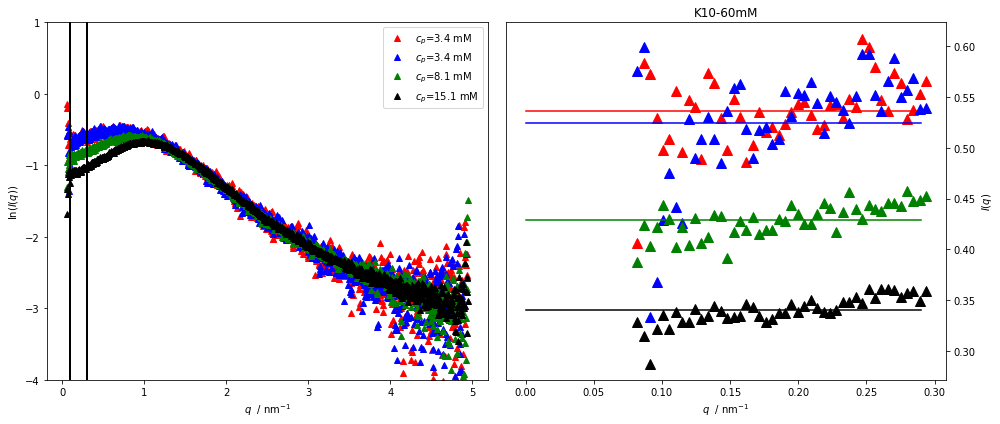

In [5]:
#plotI0(data,'R10-60mM',corra=[1.05,1.05,1,1])
plotI0(data,'K10-60mM',corra=[1,1,1.05,1])
#plotI0(data,'R10-150mM',corra=[1,1,1,1.05,1.05])
#plotI0(data,'K10-150mM',corra=[1,1.02,1,1,1])
#plotI0(data,'R10-25mM',corra=[1,1,1,1,1,1])
#plotI0(data,'K10-25mM',corra=[1,1,1,1,1,1])
#plotI0(data,'R10-300mM',corra=[1,1,1,1,1,1])
#plotI0(data,'K10-300mM',corra=[1,1,1,1,1,1])
#plotI0(data,'R8-25mM',corra=[1,1,1,1,1,1])
#plotI0(data,'R8-150mM',corra=[1,1,1,1.02,1.02,1])
#plotI0(data,'R8-300mM',corra=[1,1,1,1,1,1])
#plotI0(data,'K8-25mM',corra=[1.05,1.05,1,1,1,1])
#plotI0(data,'K8-150mM',corra=[1.05,1.05,1,1,1,1])
#plotI0(data,'K8-300mM',corra=[1,1,1.,1,1,1])
#plotI0(data,'R10-Ac-25mM',corra=[0.95,0.95,1,1,1,1])
#plotI0(data,'R8-Ac-25mM',corra=[1,1,1,1,1,1])

### SAXS curve for water

('2016 polynomial fit: ', 24.350117692447576)


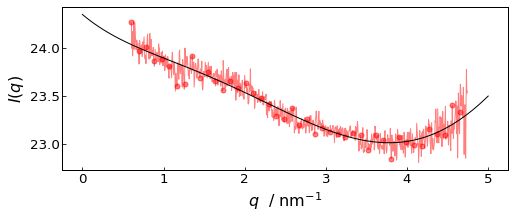

In [6]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8, 3], 'legend.fontsize': 'small',
                     'legend.frameon': False,'legend.labelspacing':0.2,
                     'legend.numpoints':1,'xtick.direction':'in','ytick.direction':'in',
                     'axes.linewidth':1.0,'xtick.labelsize':'small','ytick.labelsize':'small',
                     'axes.labelsize':'medium','xtick.major.pad':3, 'ytick.major.pad':2})

a16 = plotWat('red',minq=120,maxq=1000)
print('2016 polynomial fit: ',a16)

### Guinier Analysis and Fig. S1

Guinier Analysis for R10
('R_g', '\t\t\t', 'I(0)', '\t\t\t', 'conc')
('0.819', ' +/- ', '0.002', '\t', '5.17', ' +/- ', '0.01', '\t', '2.4', 'g/l')
('Calculated M_w of R10: ', '1581', '+/-', '   2')
('R10 - ratio calculated M_w / experimental M_w:', 1.0006345500946106)
('Relative Error:', 0.06345500946105824, '%')
........................................................
Guinier Analysis for R8
('R_g', '\t\t\t', 'I(0)', '\t\t\t', 'conc')
('0.804', ' +/- ', '0.003', '\t', '4.65', ' +/- ', '0.01', '\t', '2.5', 'g/l')
('Calculated M_w of R8: ', '1353', '+/-', '   3')
('R8 - ratio calculated M_w / experimental M_w:', 0.87201573707781588)
('Relative Error:', 12.798426292218412, '%')
........................................................
Guinier Analysis for K10
('R_g', '\t\t\t', 'I(0)', '\t\t\t', 'conc')
('0.754', ' +/- ', '0.005', '\t', '3.45', ' +/- ', '0.01', '\t', '2.9', 'g/l')
('Calculated M_w of K10: ', '1327', '+/-', '   4')
('K10 - ratio calculated M_w / experimental M_w:', 1.02105

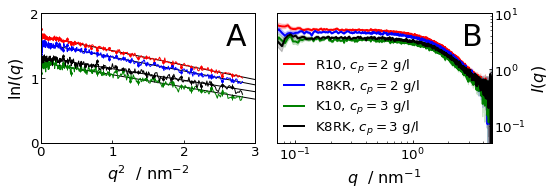

In [7]:
ax1 = plt.subplot(121)

plotGuinier('R10-300mM',data,ax1,pepdata,[0,1],corr=1,c='r')
plotGuinier('R8-300mM',data,ax1,pepdata,[0],corr=1,c='b')
plotGuinier('K10-300mM',data,ax1,pepdata,[0],corr=1,c='g')
plotGuinier('K8-300mM',data,ax1,pepdata,[1],corr=1,c='k')

plt.xlim(0,3)
plt.ylim(0,2)
plt.yticks(range(3))
plt.xticks(range(4))

#plt.legend(frameon=False,numpoints=1,loc='upper left')

ax2 = plt.subplot(122)

plotFF('R10-300mM',data,ax2,[0,1],corr=1,c='r')
plotFF('R8-300mM',data,ax2,[0],corr=1,c='b')
plotFF('K10-300mM',data,ax2,[0],corr=1,c='g')
plotFF('K8-300mM',data,ax2,[1],corr=1,c='k')

plt.ylim(0.05,10)
plt.xlim(0.07,4.7)

ax2.set_xscale("log")
ax2.set_yscale("log")

ax1.yaxis.tick_left()
ax1.xaxis.tick_bottom()
ax2.yaxis.tick_right()
ax2.xaxis.tick_bottom()

plt.figtext(0.41,0.74,'A',size=30)
plt.figtext(0.82,0.74,'B',size=30)

plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')
ax2.yaxis.set_label_position("right")
plt.legend(frameon=False,numpoints=1,loc=(0.01,0.001),handlelength=1.5)
plt.tight_layout()
plt.savefig('fig/figS1.pdf')
plt.show()

### Fig. 1

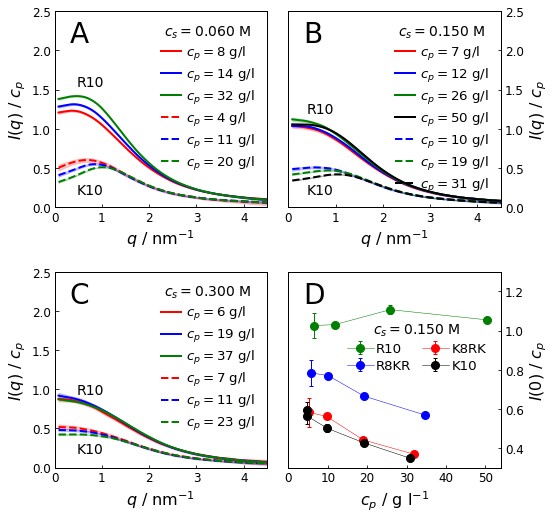

In [8]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8, 7.5], 'legend.fontsize': 'small',
                     'legend.frameon': False,'legend.labelspacing':0.3,
                     'legend.numpoints':1,'xtick.direction':'in','ytick.direction':'in',
                     'axes.linewidth':1.0,'xtick.labelsize':12,'ytick.labelsize':12,
                     'axes.labelsize':'medium','xtick.major.pad':4, 'ytick.major.pad':4})

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False)

plotiq('R10-60mM',data,ax1,[0],corr=1.05,c='r')
plotiq('R10-60mM',data,ax1,[1],corr=1.05,c='b')
plotiq('R10-60mM',data,ax1,[3],c='g')

plotiq('K10-60mM',data,ax1,[0,1],c='r',ls='--')
plotiq('K10-60mM',data,ax1,[2],corr=1.05,c='b',ls='--')
plotiq('K10-60mM',data,ax1,[3],c='g',ls='--')

plotiq('R10-150mM',data,ax2,[0,1],c='r')
plotiq('R10-150mM',data,ax2,[2],c='b')
plotiq('R10-150mM',data,ax2,[3],1.05,c='g')
plotiq('R10-150mM',data,ax2,[4],1.05,c='k')

plotiq('K10-150mM',data,ax2,[2],corr=1.02,c='b',ls='--')
plotiq('K10-150mM',data,ax2,[3],c='g',ls='--')
plotiq('K10-150mM',data,ax2,[4],c='k',ls='--')

plotiq('R10-300mM',data,ax3,[0],c='r')
plotiq('R10-300mM',data,ax3,[3,4],c='b')
plotiq('R10-300mM',data,ax3,[5],c='g')

plotiq('K10-300mM',data,ax3,[0,1],c='r',ls='--')
plotiq('K10-300mM',data,ax3,[2],c='b',ls='--')
plotiq('K10-300mM',data,ax3,[3],c='g',ls='--')

#plotiq('K8-150mM',data,ax2,[2],c='b',ls='--')
#plotiq('K8-150mM',data,ax2,[3],c='g',ls='--')
#plotiq('K8-150mM',data,ax2,[4],c='k',ls='--')

ax1.set_xlabel(r'$q$ / nm$^{-1}$')
ax2.set_xlabel(r'$q$ / nm$^{-1}$')
ax3.set_xlabel(r'$q$ / nm$^{-1}$')

i0 = np.loadtxt('b2/i0_R10-150mM.dat',comments={'#','S','P'},usecols=(0,1,2))
i0[1,1] = .5 * ( i0[0,1] + i0[1,1] )
i0[1,2] = .5 * ( i0[0,1] - i0[1,1] )
plt.errorbar(i0[:,0],i0[:,1],i0[:,2],color='g',lw=0.5,marker='o',
             markeredgecolor='g',alpha=1,label='R10',ms=8,elinewidth=1.,capsize=2,capthick=1.)

i0 = np.loadtxt('b2/i0_R8-150mM.dat',comments={'#','S','P'},usecols=(0,1,2))
i0[1,1] = .5 * ( i0[0,1] + i0[1,1] )
i0[1,2] = .5 * ( i0[0,1] - i0[1,1] )
plt.errorbar(i0[:,0],i0[:,1],i0[:,2],color='b',lw=0.5,marker='o',
             markeredgecolor='b',alpha=1,label='R8KR',ms=8,elinewidth=1.,capsize=2,capthick=1.)

i0 = np.loadtxt('b2/i0_K8-150mM.dat',comments={'#','S','P'},usecols=(0,1,2))
i0[1,1] = .5 * ( i0[0,1] + i0[1,1] )
i0[1,2] = .5 * ( i0[0,1] - i0[1,1] )
plt.errorbar(i0[:,0],i0[:,1],i0[:,2],color='r',lw=0.5,marker='o',
             markeredgecolor='r',alpha=1,label='K8RK',ms=8,elinewidth=1.,capsize=2,capthick=1.)

i0 = np.loadtxt('b2/i0_K10-150mM.dat',comments={'#','S','P'},usecols=(0,1,2))
plt.errorbar(i0[:,0],i0[:,1],i0[:,2],color='k',lw=0.5,marker='o',
             markeredgecolor='k',alpha=1,label='K10',ms=8,elinewidth=1.,capsize=2,capthick=1.)

ax4.set_xlabel(r'$c_p$ / g l$^{-1}$')
ax4.set_ylabel(r'$I(0)$ / $c_p$')
ax4.set_xlim(0,54)
ax4.set_xticks(np.arange(0,55,10))
ax4.set_ylim(0.3,1.3)
ax4.legend(loc=(.25,.46),ncol=2,handletextpad=0.2,columnspacing=.8,title='$c_s=0.150$'+' M')
ax4.get_legend().get_title().set_fontsize('14')

plt.figtext(0.15,0.82,'R10',size=14)
plt.figtext(0.15,0.62,'K10',size=14)

plt.figtext(0.55,0.77,'R10',size=14)
plt.figtext(0.55,0.62,'K10',size=14)

plt.figtext(0.15,0.25,'R10',size=14)
plt.figtext(0.15,0.14,'K10',size=14)

ax1.yaxis.tick_left()
ax3.yaxis.tick_left()

ax1.annotate('A',xy=(0.07,0.84),xycoords='axes fraction',color='k',fontsize=28)
ax2.annotate('B',xy=(0.07,0.84),xycoords='axes fraction',color='k',fontsize=28)
ax3.annotate('C',xy=(0.07,0.84),xycoords='axes fraction',color='k',fontsize=28)
ax4.annotate('D',xy=(0.07,0.84),xycoords='axes fraction',color='k',fontsize=28)

plt.setp(ax1.get_xticklabels(), visible=True)
plt.setp(ax2.get_xticklabels(), visible=True)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
f.tight_layout()
f.savefig('fig/fig1.pdf')
plt.show()

### Fig. S2

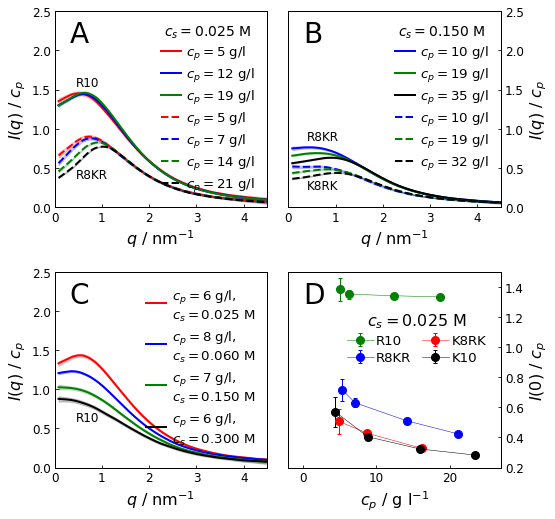

In [9]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8, 7.5], 
                     'savefig.dpi': 600, 'legend.fontsize': 'small', 'legend.frameon': False,
                     'legend.labelspacing':0.3,
                     'legend.numpoints':1,'xtick.direction':'in','ytick.direction':'in',
                     'axes.linewidth':1.0,'xtick.labelsize':12,'ytick.labelsize':12,
                     'axes.labelsize':'medium','xtick.major.pad':4, 'ytick.major.pad':4})

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False)

plotiq('R10-25mM',data,ax1,[0,1],c='r')
#plotiq('R10-25mM',data,ax1,[2],c='b')
plotiq('R10-25mM',data,ax1,[3],c='b')
plotiq('R10-25mM',data,ax1,[4],c='g')

plotiq('R8-25mM',data,ax1,[0,1],c='r',ls='--')
plotiq('R8-25mM',data,ax1,[2],c='b',ls='--')
plotiq('R8-25mM',data,ax1,[3],c='g',ls='--')
plotiq('R8-25mM',data,ax1,[4],c='k',ls='--')

plotiq('R8-150mM',data,ax2,[2],c='b')
plotiq('R8-150mM',data,ax2,[3],1.02,c='g')
plotiq('R8-150mM',data,ax2,[4],1.02,c='k')

plotiq('K8-150mM',data,ax2,[2],1.05,c='b',ls='--')
plotiq('K8-150mM',data,ax2,[3],c='g',ls='--')
plotiq('K8-150mM',data,ax2,[4],c='k',ls='--')

plotiq_cs('R10-25mM',data,ax3,[2],c='r')
plotiq_cs('R10-60mM',data,ax3,[0],corr=1.05,c='b')
plotiq_cs('R10-150mM',data,ax3,[0,1],c='g')
plotiq_cs('R10-300mM',data,ax3,[0],c='k')

ax1.set_xlabel(r'$q$ / nm$^{-1}$')
ax2.set_xlabel(r'$q$ / nm$^{-1}$')
ax3.set_xlabel(r'$q$ / nm$^{-1}$')

i0 = np.loadtxt('b2/i0_R10-25mM.dat',comments={'#','S','P'},usecols=(0,1,2))
plt.errorbar(i0[:,0],i0[:,1],i0[:,2],color='g',lw=0.5,marker='o',
             markeredgecolor='g',alpha=1,label='R10',ms=8,elinewidth=1.,capsize=2,capthick=1.)

i0 = np.loadtxt('b2/i0_R8-25mM.dat',comments={'#','S','P'},usecols=(0,1,2))
plt.errorbar(i0[:,0],i0[:,1],i0[:,2],color='b',lw=0.5,marker='o',
             markeredgecolor='b',alpha=1,label='R8KR',ms=8,elinewidth=1.,capsize=2,capthick=1.)

i0 = np.loadtxt('b2/i0_K8-25mM.dat',comments={'#','S','P'},usecols=(0,1,2))
plt.errorbar(i0[:,0],i0[:,1],i0[:,2],color='r',lw=0.5,marker='o',
             markeredgecolor='r',alpha=1,label='K8RK',ms=8,elinewidth=1.,capsize=2,capthick=1.)

i0 = np.loadtxt('b2/i0_K10-25mM.dat',comments={'#','S','P'},usecols=(0,1,2))
plt.errorbar(i0[:,0],i0[:,1],i0[:,2],color='k',lw=0.5,marker='o',
             markeredgecolor='k',alpha=1,label='K10',ms=8,elinewidth=1.,capsize=2,capthick=1.)

ax4.set_xlabel(r'$c_p$ / g l$^{-1}$')
ax4.set_ylabel(r'$I(0)$ / $c_p$')
ax4.set_xlim(-2,27)
ax4.set_ylim(.2,1.5)
ax4.legend(loc=(.25,.5),ncol=2,handletextpad=0.2,columnspacing=.8,title='$c_s=0.025$ M')

plt.figtext(0.15,0.82,'R10',size=12)
plt.figtext(0.15,0.65,'R8KR',size=12)
plt.figtext(0.55,0.72,'R8KR',size=12)
plt.figtext(0.55,0.63,'K8RK',size=12)
plt.figtext(0.15,0.20,'R10',size=12)

ax1.annotate('A',xy=(0.07,0.84),xycoords='axes fraction',color='k',fontsize=28)
ax2.annotate('B',xy=(0.07,0.84),xycoords='axes fraction',color='k',fontsize=28)
ax3.annotate('C',xy=(0.07,0.84),xycoords='axes fraction',color='k',fontsize=28)
ax4.annotate('D',xy=(0.07,0.84),xycoords='axes fraction',color='k',fontsize=28)

plt.setp(ax1.get_xticklabels(), visible=True)
plt.setp(ax2.get_xticklabels(), visible=True)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
plt.tight_layout()
plt.savefig('fig/figS2.pdf')
plt.show()

### Fig. S4

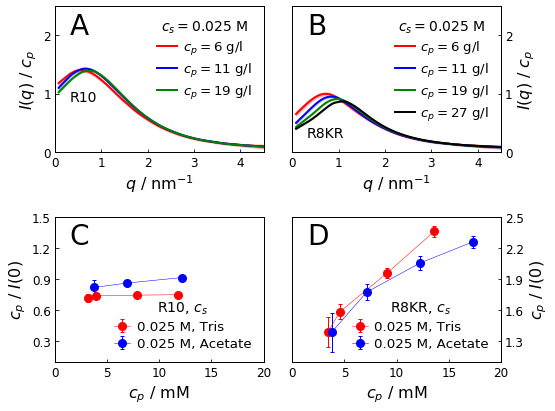

In [10]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8, 6], 
                     'savefig.dpi': 600, 'legend.fontsize': 'small', 'legend.frameon': False,
                     'legend.labelspacing':0.3,
                     'legend.numpoints':1,'xtick.direction':'in','ytick.direction':'in',
                     'axes.linewidth':1.0,'xtick.labelsize':12,'ytick.labelsize':12,
                     'axes.labelsize':'medium','xtick.major.pad':4, 'ytick.major.pad':4})

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2)

plotiq('R10-Ac-25mM',data,ax1,[0,1],c='r',corr=.95)
plotiq('R10-Ac-25mM',data,ax1,[2],c='b')
plotiq('R10-Ac-25mM',data,ax1,[3],c='g')

plotiq('R8-Ac-25mM',data,ax2,[0,1],c='r')
plotiq('R8-Ac-25mM',data,ax2,[2],c='b')
plotiq('R8-Ac-25mM',data,ax2,[3],c='g')
plotiq('R8-Ac-25mM',data,ax2,[4],c='k')

plotI0inv('R8-25mM',ax4,mw=1.552,c='r',l=', Tris')
plotI0inv('R8-Ac-25mM',ax4,mw=1.552,c='b',l=', Acetate')

plotI0inv('R10-25mM',ax3,mw=1.58,c='r',l=', Tris')
plotI0inv('R10-Ac-25mM',ax3,mw=1.58,c='b',l=', Acetate')

ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
ax3.legend(title='R10, $c_s$',handlelength=1.2,handletextpad=0.5)
ax4.legend(title='R8KR, $c_s$',handlelength=1.2,handletextpad=0.5)
ax3.get_legend().get_title().set_fontsize('14')
ax4.get_legend().get_title().set_fontsize('14')
ax3.set_yticks([0.3,0.6,0.9,1.2,1.5])
ax4.set_yticks([1.3,1.6,1.9,2.2,2.5])
ax3.set_ylim(0.1,1.5)
ax4.set_ylim(1.1,2.5)

ax1.annotate('A',xy=(0.07,0.81),xycoords='axes fraction',color='k',fontsize=28)
ax2.annotate('B',xy=(0.07,0.81),xycoords='axes fraction',color='k',fontsize=28)
ax3.annotate('C',xy=(0.07,0.81),xycoords='axes fraction',color='k',fontsize=28)
ax4.annotate('D',xy=(0.07,0.81),xycoords='axes fraction',color='k',fontsize=28)

ax3.set_xticks([0,5,10,15,20])
ax3.set_xlim(0,20)

ax4.set_xticks([0,5,10,15,20])
ax4.set_xlim(0,20)

ax1.set_xlabel(r'$q$ / nm$^{-1}$')
ax2.set_xlabel(r'$q$ / nm$^{-1}$')

ax1.annotate('R10',xy=(0.07,0.35),xycoords='axes fraction',color='k',fontsize=14)
ax2.annotate('R8KR',xy=(0.07,0.1),xycoords='axes fraction',color='k',fontsize=14)

ax1.set_yticks(range(3))
ax2.set_yticks(range(3))

plt.setp(ax1.get_xticklabels(), visible=True)
plt.setp(ax2.get_xticklabels(), visible=True)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.tight_layout()
plt.savefig('fig/figS4.pdf')
plt.show()

## HSQC NMR data
### Fig. 4

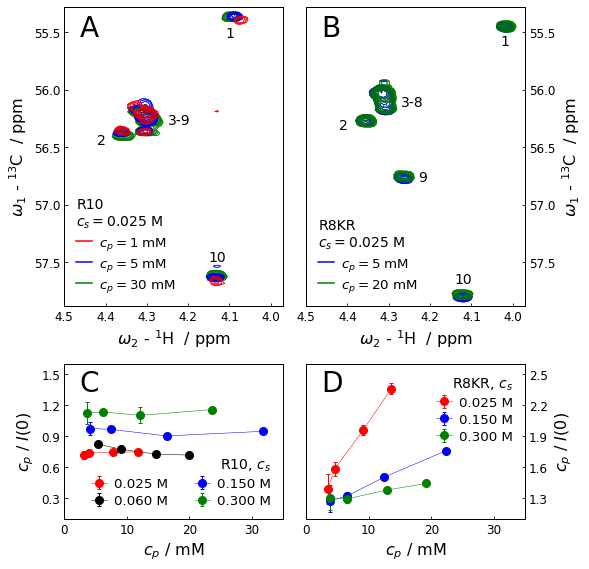

In [11]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8, 8], 
                     'legend.fontsize': 'small', 'legend.frameon': False,
                     'legend.labelspacing':0.3,'axes.labelpad':5,
                     'legend.numpoints':1,'xtick.direction':'in','ytick.direction':'in',
                     'axes.linewidth':1.0,'xtick.labelsize':12,'ytick.labelsize':12,
                     'axes.labelsize':'medium','xtick.major.pad':4, 'ytick.major.pad':4})

ax1 = plt.axes([.1, 0.45, .38, 0.52])
ax2 = plt.axes([.52, 0.45, .38, 0.52])
ax3 = plt.axes([.1, 0.08, .38, 0.27])
ax4 = plt.axes([.52, 0.08, .38, 0.27])

r10_30 = np.loadtxt('../nmr/r10_30mM.csv',comments={'#','S','P'},usecols=(0,1))
r10_5 = np.loadtxt('../nmr/r10_5mM.csv',comments={'#','S','P'},usecols=(0,1))
r10_1 = np.loadtxt('../nmr/r10_1mM.csv',comments={'#','S','P'},usecols=(0,1))

r8_5 = np.loadtxt('../nmr/r8_5mM.csv',comments={'#','S','P'},usecols=(0,1))
r8_20 = np.loadtxt('../nmr/r8_20mM.csv',comments={'#','S','P'},usecols=(0,1))

ax1.scatter(r10_30[:,0],r10_30[:,1],s=.1,c='g',marker='o',edgecolor='none',label='R10 30 mM')
ax1.scatter(r10_5[:,0],r10_5[:,1],s=.1,c='b',marker='o',edgecolor='none',label='R10 5 mM')
ax1.scatter(r10_1[:,0],r10_1[:,1],s=.1,c='r',marker='o',edgecolor='none',label='R10 1 mM')

ax1.invert_xaxis()
ax1.invert_yaxis()

ax2.scatter(r8_5[:,0],r8_5[:,1],s=.1,c='b',marker='o',edgecolor='none',label='R8KR 5 mM')
ax2.scatter(r8_20[:,0],r8_20[:,1],s=.1,c='g',marker='o',edgecolor='none',label='R8KR 20 mM')
ax2.invert_xaxis()
ax2.invert_yaxis()

ax1.set_xlabel(r'$\omega_2$ - $^1$H  / ppm')
ax1.set_ylabel(r'$\omega_1$ - $^{13}$C  / ppm')

ax2.set_xlabel(r'$\omega_2$ - $^1$H  / ppm')
ax2.set_ylabel(r'$\omega_1$ - $^{13}$C  / ppm')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

lr10_1 = mlines.Line2D([], [], color='r', label='$c_p=1$ mM')
lr10_5 = mlines.Line2D([], [], color='b', label='$c_p=5$ mM')
lr10_30 = mlines.Line2D([], [], color='g', label='$c_p=30$ mM')
lr8_5 = mlines.Line2D([], [], color='b', label='$c_p=5$ mM')
lr8_30 = mlines.Line2D([], [], color='g', label='$c_p=20$ mM')
ax1.legend(handles=[lr10_1,lr10_5,lr10_30],handlelength=1.2,framealpha=1,title='R10\n$c_s=0.025$ M',
                handletextpad=0.5,edgecolor='white',facecolor='white',loc='lower left',frameon=False)
ax2.legend(handles=[lr8_5,lr8_30],handlelength=1.2,handletextpad=0.5,framealpha=1,title='R8KR\n$c_s=0.025$ M',
               edgecolor='white',loc='lower left',frameon=False)
ax1.get_legend().get_title().set_fontsize('14')
ax2.get_legend().get_title().set_fontsize('14')
ax1.get_legend()._legend_box.align = "left"
ax2.get_legend()._legend_box.align = "left"
ax1.set_xlim(4.5,3.97)
ax2.set_xlim(4.5,3.97)
ax1.set_ylim(57.88,55.28)
ax2.set_ylim(57.88,55.28)
#ax1.set_yticks([58,57,56,55])
#ax2.set_yticks([58,57,56,55])
ax1.annotate('1',xy=(4.11,55.55),xycoords='data',color='k',fontsize=14)
ax1.annotate('10',xy=(4.15,57.49),xycoords='data',color='k',fontsize=14)
ax1.annotate('2',xy=(4.42,56.48),xycoords='data',color='k',fontsize=14)
ax1.annotate('3-9',xy=(4.25,56.3),xycoords='data',color='k',fontsize=14)
ax2.annotate('1',xy=(4.03,55.62),xycoords='data',color='k',fontsize=14)
ax2.annotate('10',xy=(4.14,57.68),xycoords='data',color='k',fontsize=14)
ax2.annotate('2',xy=(4.42,56.35),xycoords='data',color='k',fontsize=14)
ax2.annotate('9',xy=(4.23,56.8),xycoords='data',color='k',fontsize=14)
ax2.annotate('3-8',xy=(4.27,56.15),xycoords='data',color='k',fontsize=14)

plotI0inv('R8-25mM',ax4,mw=1.552,c='r')
#plotI0inv('R8-Ac-25mM',ax4,mw=1.552,c='y')
plotI0inv('R8-150mM',ax4,mw=1.552,c='b')
plotI0inv('R8-300mM',ax4,mw=1.552,c='g')

plotI0inv('R10-25mM',ax3,mw=1.58,c='r')
#plotI0inv('R10-Ac-25mM',ax3,mw=1.58,c='y')
plotI0inv('R10-60mM',ax3,mw=1.58,c='k')
plotI0inv('R10-150mM',ax3,mw=1.58,c='b')
plotI0inv('R10-300mM',ax3,mw=1.58,c='g')

circle=plt.Circle((4.35,57.6),.05,color='white',fill=True,lw=2)
ax1.add_artist(circle)

ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
ax3.legend(title='R10, $c_s$',handlelength=1.2,handletextpad=0.5,ncol=2)
ax4.legend(title='R8KR, $c_s$',handlelength=1.2,handletextpad=0.5)
ax3.get_legend().get_title().set_fontsize('14')
ax4.get_legend().get_title().set_fontsize('14')
ax3.set_yticks([0.3,0.6,0.9,1.2,1.5])
ax4.set_yticks([1.3,1.6,1.9,2.2,2.5])
ax3.set_ylim(0.1,1.6)
ax4.set_ylim(1.1,2.6)

ax3.get_legend()._legend_box.align = 'right'
ax4.get_legend()._legend_box.align = 'right'

ax1.annotate('A',xy=(0.07,0.9),xycoords='axes fraction',color='k',fontsize=28)
ax2.annotate('B',xy=(0.07,0.9),xycoords='axes fraction',color='k',fontsize=28)
ax3.annotate('C',xy=(0.07,0.82),xycoords='axes fraction',color='k',fontsize=28)
ax4.annotate('D',xy=(0.07,0.82),xycoords='axes fraction',color='k',fontsize=28)

ax3.set_xticks([0,10,20,30])
ax3.set_xlim(0,35)

ax4.set_xticks([0,10,20,30])
ax4.set_xlim(0,35)

plt.savefig('../nmr/fig4.pdf')
plt.show()

# Potentials of Mean Force

We change into the main working directory and create arrays with the numbers identifying the umbrella windows

In [12]:
%cd $workdir

# AMBER ff03W force field
windows_r10_0 = np.array([26,100,74,127,141,176,182,184,201,197,241,244,247,251,257,261,9,15,33,52,63])
windows_r10_60 = np.array([8,21,45,62,73,87,107,121,140,157,171,188,200,221])
windows_r10_300 = np.array([106,119,151,157,160,163,171,174,203,200,209,224,240,245,190,6,10,22,40])
windows_k10_0 = np.array([0,2,49,104,7,131,135,138,149,156,162,165,168,173,227,186,191,254])
windows_k10_60 = np.array([4,24,42,57,74,97,113,131,146,172,184,203])
windows_k10_300 = np.array([6,20,32,45,66,81,96,108,128,136,154,170,182,201])
# AMBER ff99SB-ILDN force field
windows_r10_60_108 = np.array([26, 323, 513, 869, 1069, 1447, 1667, 1990, 2272, 2480, 2678, 2960])
windows_r8_60_108 = np.array([1, 5, 18, 26, 30, 39, 45, 51, 59, 67, 72])
windows_r10_0_99 = np.array([26, 74, 100, 127, 141, 176, 182])
windows_r10_60_99 = np.array([8, 21, 30, 45, 62, 73, 87, 107, 121, 140, 157, 171, 188, 200, 221])
windows_r10_300_99 = np.array([106, 119, 151, 157, 160, 163, 171])
windows_r4_60_33 = np.array([1, 11, 17, 26, 35, 43, 51, 59, 66, 75])

# Debye-Hückel free energy
def DH(x,cs):
    lD = 0.304/np.sqrt(cs/1e3)
    return 8.3145*0.293*100*0.713/x*np.exp(-x/lD)

/Users/giulio/PNAS-resub/decaarginine


We calculate average distances between different atoms on two interacting peptides.
For different peptides and solution conditions, we save to file average distances with standard deviations and the Debye-Hückel energy estimated from the average mass center separation in the umbrella sampling windows.

In [13]:
us = [{'sys':'r10_0','sims':windows_r10_0},
      {'sys':'r10_60','sims':windows_r10_60},
      {'sys':'r10_300','sims':windows_r10_300},
      {'sys':'k10_0','sims':windows_k10_0},
      {'sys':'k10_60','sims':windows_k10_60},
      {'sys':'k10_300','sims':windows_k10_300}
]

for sys in us:
    pep = sys['sys'].split('_')[0]
    cs = sys['sys'].split('_')[1]
    sims = sys['sims']
    c = np.empty(0)
    cerr = np.empty(0)
    x = np.empty(0)
    y = np.empty(0)
    xerr = np.empty(0)
    yerr = np.empty(0)
    ionic_strength = 1e10
    if (cs == '0'):
        ionic_strength = 14
    if (cs == '60'):
        ionic_strength = 71
    if (cs == '300'):
        ionic_strength = 315
    path = 'distances/'+cs+'mM/'+pep+'_99_a03/'
    for sim in sims:
        mean99 = np.loadtxt(path+str(sim)+'-99.dat',comments={'#','@'},usecols=(0,1))[:,1].mean()
        std99 = np.loadtxt(path+str(sim)+'-99.dat',comments={'#','@'},usecols=(0,1))[:,1].std()
        meanCom = np.loadtxt(path+str(sim)+'-com.dat',comments={'#','@'},usecols=(0,1))[:,1].mean()
        stdCom = np.loadtxt(path+str(sim)+'-com.dat',comments={'#','@'},usecols=(0,1))[:,1].std()
        x = np.append(x,mean99)
        xerr = np.append(xerr,std99)
        c = np.append(c,meanCom)
        cerr = np.append(cerr,stdCom)
    y = DH(c,ionic_strength)
    yerr = np.abs( DH(c+cerr,ionic_strength) - DH(c-cerr,ionic_strength) )
    dh = np.c_[x,y,xerr,yerr]
    avg = np.c_[x,c,y]
    std = np.c_[xerr,cerr,yerr]
    np.savetxt(path+'dh.dat',dh)
    np.savetxt(path+'avg.dat',avg)
    np.savetxt(path+'std.dat',std)
    
##################################################

us = [{'sys':'r10_60_99','sims':windows_r10_60_99},
      {'sys':'r10_60_108','sims':windows_r10_60_108},
      {'sys':'r8_60_108','sims':windows_r8_60_108}
]

for sys in us:
    pep = sys['sys'].split('_')[0]
    cs = sys['sys'].split('_')[1]
    rc = sys['sys'].split('_')[2]
    path = 'distances/'+cs+'mM/'+pep+'_'+rc+'_a99/'
    pathd = path + 'dist/'
    pathrc = path + 'rc/'
    ionic_strength = 1e10
    if (cs == '0'):
        ionic_strength = 14
    if (cs == '60'):
        ionic_strength = 71
    if (cs == '300'):
        ionic_strength = 315
    avg = np.empty(0)
    std = np.empty(0)
    dh = np.empty(0)
    d_cmcm = np.empty(0)
    for sim in sys['sims']:
        d99 = np.loadtxt(pathd+str(sim)+'-99.xvg',comments={'#','@'})[500:,1]
        d108 = np.loadtxt(pathd+str(sim)+'-108.xvg',comments={'#','@'})[500:,1]
        d810 = np.loadtxt(pathd+str(sim)+'-810.xvg',comments={'#','@'})[500:,1]
        dcom = np.loadtxt(pathd+str(sim)+'-com.xvg',comments={'#','@'})[500:,1]
        
        rcfile = glob.glob(pathrc+str(sim)+'-*.dat')[0]
        rc = np.loadtxt(rcfile,comments={'#','@'})
        if (rc[0,0] != 0):
            print(path,sim,rc[0,:])
            
        fdh = DH(dcom,ionic_strength)
    
        dh = np.append(dh,[rc[1000:,1].mean(),fdh.mean(),rc[1000:,1].std(),fdh.std()])
        avg = np.append(avg,[d99.mean(),d108.mean(),d810.mean(),dcom.mean(),fdh.mean()])
        std = np.append(std,[d99.std(),d108.std(),d810.std(),dcom.std(),fdh.std()])
               
    np.savetxt(path+'dh.dat',dh.reshape((int(sys['sims'].size),4)),fmt='%.3f')
    np.savetxt(path+'avg.dat',avg.reshape((int(sys['sims'].size),5)),fmt='%.3f')
    np.savetxt(path+'std.dat',std.reshape((int(sys['sims'].size),5)),fmt='%.3f')
    
##################################################

us = [{'sys':'r10_0_99','sims':windows_r10_0_99},
      {'sys':'r10_300_99','sims':windows_r10_300_99},
      {'sys':'r4_60_33','sims':windows_r4_60_33}
]

for sys in us:
    pep = sys['sys'].split('_')[0]
    cs = sys['sys'].split('_')[1]
    rc = sys['sys'].split('_')[2]
    path = 'distances/'+cs+'mM/'+pep+'_'+rc+'_a99/'
    pathd = path + 'dist/'
    ionic_strength = 1e10
    if (cs == '0'):
        ionic_strength = 14
    if (cs == '60'):
        ionic_strength = 68
    if (cs == '300'):
        ionic_strength = 315
    avg = np.empty(0)
    std = np.empty(0)
    dh = np.empty(0)
    d_cmcm = np.empty(0)
    for sim in sys['sims']:
        d = np.loadtxt(pathd+str(sim)+'-'+rc+'.xvg',comments={'#','@'})[500:,1]
        dcom = np.loadtxt(pathd+str(sim)+'-com.xvg',comments={'#','@'})[500:,1]
            
        fdh = DH(dcom,ionic_strength)
        if (pep == 'r4'):
            fdh = fdh*4*4/100.
    
        dh = np.append(dh,[d.mean(),fdh.mean(),d.std(),fdh.std()])
        avg = np.append(avg,[d.mean(),dcom.mean(),fdh.mean()])
        std = np.append(std,[d.std(),dcom.std(),fdh.std()])
               
    np.savetxt(path+'dh.dat',dh.reshape((int(sys['sims'].size),4)),fmt='%.3f')
    np.savetxt(path+'avg.dat',avg.reshape((int(sys['sims'].size),3)),fmt='%.3f')
    np.savetxt(path+'std.dat',std.reshape((int(sys['sims'].size),3)),fmt='%.3f')

We load the estimated Debye-Hückel energies.

In [14]:
r10_0 = np.loadtxt('distances/0mM/r10_99_a03/dh.dat')
r10_60 = np.loadtxt('distances/60mM/r10_99_a03/dh.dat')
r10_300 = np.loadtxt('distances/300mM/r10_99_a03/dh.dat')
k10_0 = np.loadtxt('distances/0mM/k10_99_a03/dh.dat')
k10_60 = np.loadtxt('distances/60mM/k10_99_a03/dh.dat')
k10_300 = np.loadtxt('distances/300mM/k10_99_a03/dh.dat')

We load the potentials of mean force calculated using the Gromacs routine $gmx$ $wham$.

In [15]:
# R10 9 -- 9, AMBER ff99SB-ILDN force field
pmf_r10_0_99_99 = np.loadtxt('pmfs/r10_0-99-99.xvg',comments={'#','@'},usecols=(0,1,2))
pmf_r10_60_99_99 = np.loadtxt('pmfs/r10_60-99-99.xvg',comments={'#','@'},usecols=(0,1,2))
pmf_r10_300_99_99 = np.loadtxt('pmfs/r10_300-99-99.xvg',comments={'#','@'},usecols=(0,1,2))
# R10 9 -- 9, AMBER ff03W force field
pmf_r10_0_99_03 = np.loadtxt('pmfs/r10_0-99-03.xvg',comments={'#','@'},usecols=(0,1,2))
pmf_r10_60_99_03 = np.loadtxt('pmfs/r10_60-99-03.xvg',comments={'#','@'},usecols=(0,1,2))
pmf_r10_300_99_03 = np.loadtxt('pmfs/r10_300-99-03.xvg',comments={'#','@'},usecols=(0,1,2))
# K10 9 -- 9, AMBER ff03W force field
pmf_k10_0_99_03 = np.loadtxt('pmfs/k10_0-99-03.xvg',comments={'#','@'},usecols=(0,1,2))
pmf_k10_60_99_03 = np.loadtxt('pmfs/k10_60-99-03.xvg',comments={'#','@'},usecols=(0,1,2))
pmf_k10_300_99_03 = np.loadtxt('pmfs/k10_300-99-03.xvg',comments={'#','@'},usecols=(0,1,2))
# R4  3 -- 3, AMBER ff99SB-ILDN force field
pmf_r4_60_33_99 = np.loadtxt('pmfs/r4_60-33-99.xvg',comments={'#','@'},usecols=(0,1,2))
# R8KR 10 -- 8, AMBER ff99SB-ILDN force field
pmf_r8_60_108_99 = np.loadtxt('pmfs/r8_60-108-99.xvg',comments={'#','@'},usecols=(0,1,2))
# R10 10 -- 8, AMBER ff99SB-ILDN force field
pmf_r10_60_108_99 = np.loadtxt('pmfs/r10_60-108-99.xvg',comments={'#','@'},usecols=(0,1,2))
# R8KR 10 -- 2, AMBER ff99SB-ILDN force field
pmf_r8_60_102_99 = np.loadtxt('pmfs/r8_60-102-99.xvg',comments={'#','@'},usecols=(0,1,2))
# R10 10 -- 2, AMBER ff99SB-ILDN force field
pmf_r10_60_102_99 = np.loadtxt('pmfs/r10_60-102-99.xvg',comments={'#','@'},usecols=(0,1,2))

We define a function and initialize arrays to generate the scheme in Fig. 2 illustrating the electrostatic interactions in the R10 dimeric structures. 

In [16]:
def DHscheme(x,y,q,cs):
    lD = 0.304/np.sqrt(cs/1e3)
    dhsum = np.empty(0)
    for i in range(x.size):
        x1 = np.delete(x,i) - x[i]
        y1 = np.delete(y,i) - y[i]
        qq = q[i]*np.delete(q,i)
        d = np.sqrt(x1*x1+y1*y1)
        dh = qq*0.713/d*np.exp(-d/lD)
        dhsum = np.append(dhsum,dh.sum())
    #print(dhsum.max(),dhsum.min())
    return dhsum

x = np.array([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11,9.5,10,11,12,13,14,15,16,17,18,19])
q = np.array([2])
q = np.append(q,np.full(shape=(9,1),fill_value=1))
q = np.append(q,[-1,-1])
q = np.append(q,np.full(shape=(9,1),fill_value=1))
q = np.append(q,2)
markers = np.array(['o','o','o','o','o','o','o','o','o','o','^','v','o','o','o','o','o','o','o','o','o','o'])

### Fig. 2

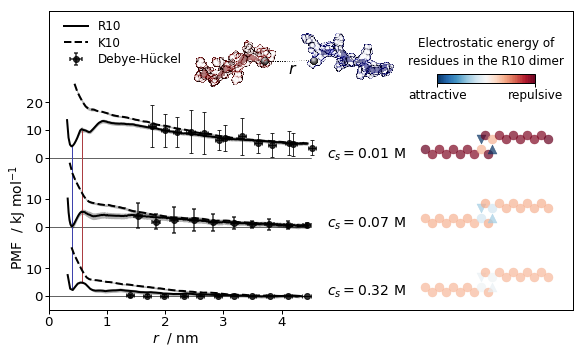

In [17]:
def find_nearest(y,y0):
    idx = (np.abs(y-y0)).argmin()
    return idx
    
def plotPMF(array,c='black',w=0,a=0.3,l='',ls='-',shift=0,cs='0',pep='r10',rc='99',ff='a03'):
    """Plots the PMF with a shaded area representing the standard deviations of bootstrapped free energy prfiles.
    The function takes the following arguments:
    - array: PMF vs. distance
    - subplot
    - rmax: upper limit of the distance range
    - c: line color
    - w: line width
    - a: opacity of the shaded area
    - l: legend
    - shift: value by which the PMF is shifted vertically
    - ls: line style
    - cs: ionic strength
    - pep: peptide name
    - rc: residue numbers defining the reaction coordinate
    - ff: force field"""
    path = 'distances/'+cs+'mM/'+pep+'_'+rc+'_'+ff+'/'
    dh = np.loadtxt(path+'dh.dat')
    # find index of largest distance
    maxdh = find_nearest(dh[:,0],4.4)
    maxd = find_nearest(array[:,0],dh[maxdh,0])
    # print(array[maxd,0],dh[maxdh,0])
    r = array[:maxd,0]
    pmf = array[:maxd,1]+8.3145*0.293*2*np.log(array[:maxd,0])
    pmf = pmf - pmf[-1] + dh[maxdh,1] + shift
    pmfl = pmf - array[:maxd,2]
    pmfu = pmf + array[:maxd,2]
    #minimum = find_nearest(r,.4)
    #print(path,pmf[minimum]-shift)
    #print(path,pmfl[minimum]-shift)
    #print(path,pmfu[minimum]-shift)
    #print(path,r[minimum])
    plt.fill_between(r,pmfl,pmfu,alpha=a,color=c,lw=0)
    plt.plot(r,pmf,color=c,lw=w,label=l,linestyle=ls)

plt.rcParams.update({'font.size': 16, 'figure.figsize': [8, 5], 
                     'savefig.dpi': 600, 'legend.fontsize': 12, 'legend.frameon': False,
                     'legend.numpoints':1,'xtick.direction':'out','ytick.direction':'out',
                     'axes.linewidth':1.,'xtick.labelsize':'small',
                     'ytick.labelsize':'small','axes.labelsize':'medium',
                     'xtick.major.pad':2, 'ytick.major.pad':2})

fig = plt.figure()

ax3 = plt.axes([.635, .13, .33, 0.83])
yticks = np.arange(-2, 26,5)
xticks = np.arange(0,5,1)
ax3.patch.set_alpha(0)

plt.xlim(-3.5,23.5)
plt.ylim(-10,120)
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
ax3.patch.set_alpha(0)
plt.xticks([])
plt.yticks([])
ax3.spines['left'].set_color('white')
ax3.spines['right'].set_color('white')
ax3.spines['top'].set_color('white')
ax3.spines['bottom'].set_color('white')

y = np.append(np.tile([1,.93],5),[1,1.14])
y = np.append(y,np.tile([1.21,1.14],5))*30

vmin = DHscheme(x*3,y/10,q,0.5).min()
vmax = DHscheme(x*3,y/10,q,0.01).max()

cmap = cm.RdBu_r

y = y - 30
for xx, yy, dh, mm in zip(x, y, DHscheme(x*3,y/10,q,302), markers):
    plt.scatter(xx+3,yy,c=dh, cmap=cmap,s=80,lw=0.5,vmin=vmin,vmax=vmax,alpha=0.7,marker=mm)
    
y = y + 30
for xx, yy, dh, mm in zip(x, y, DHscheme(x*3,y/10,q,57), markers):
    plt.scatter(xx+3,yy,c=dh, cmap=cmap,s=80,lw=0.5,vmin=vmin,vmax=vmax,alpha=0.7,marker=mm)
    
y = y + 30
for xx, yy, dh, mm in zip(x, y, DHscheme(x*3,y/10,q,0.0001), markers):
    plt.scatter(xx+3,yy,c=dh, cmap=cmap,s=80,lw=0.5,vmin=vmin,vmax=vmax,alpha=0.7,marker=mm)
    
ax4 = plt.axes([.755, .76, .17, .1])
plt.xticks([])
plt.yticks([])
ax4.spines['bottom'].set_color('white')
ax4.spines['top'].set_color('white') 
ax4.spines['right'].set_color('white')
ax4.spines['left'].set_color('white')
ax4.patch.set_alpha(0)
cbar_ax = fig.add_axes([.755, .76, .17, .025])
cb = colorbar(cax=cbar_ax, orientation='horizontal',drawedges=False)
cb.set_label('Electrostatic energy of\nresidues in the R10 dimer',size=12,labelpad=-65,linespacing=1.5)
cb.set_ticks((vmin,vmax))
cb.set_ticklabels(['attractive','repulsive'])
cb.ax.tick_params(axis='both', length=4, width=1.,labelsize=12)

ax2 = plt.axes([.33, .65, .35, .35])
img=mpimg.imread('fig/dimerk10.png')
ax2.imshow(img)
plt.xticks([])
plt.yticks([])
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white') 
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.patch.set_alpha(0)

ax1 = plt.axes([.08, .13, .91, 0.83])
yticks = np.arange(-10,98,10)
xticks = np.arange(0,5,1)
plt.xlim(0,9)
plt.ylim(-10,98)
plt.xticks(xticks)
plt.yticks(yticks)
ax1.patch.set_alpha(0)

plt.axhline(y=-5,xmin=0,xmax=.5,color='black',lw=.6)
plt.axhline(y=20,xmin=0,xmax=.5,color='black',lw=.6)
plt.axhline(y=45,xmin=0,xmax=.5,color='black',lw=.6)

plt.axvline(x=.4,ymin=.07,ymax=.55,color='#3f43ad',lw=1)
plt.axvline(x=.58,ymin=.09,ymax=.6,color='#ac3e42',lw=1)

plotPMF(pmf_r10_0_99_03,'black',w=2,l='R10',ls='-',shift=45,cs='0',pep='k10',rc='99',ff='a03')
plotPMF(pmf_k10_0_99_03,'black',w=2,l='K10',ls='--',shift=45,cs='0',pep='k10',rc='99',ff='a03')

plotPMF(pmf_r10_60_99_03,'black',w=2,ls='-',shift=20,cs='60',pep='k10',rc='99',ff='a03')
plotPMF(pmf_k10_60_99_03,'black',w=2,ls='--',shift=20,cs='60',pep='k10',rc='99',ff='a03')

plotPMF(pmf_r10_300_99_03,'black',w=2,ls='-',shift=-5,cs='300',pep='r10',rc='99',ff='a03')
plotPMF(pmf_k10_300_99_03,'black',w=2,ls='--',shift=-5,cs='300',pep='k10',rc='99',ff='a03')

labels = ['0', '10', '0', '10','0','10','20']
plt.yticks([-5,5,20,30,45,55,65],labels)

plt.errorbar(r10_0[6:-2,0],r10_0[6:-2,1]+45,r10_0[6:-2,3],r10_0[6:-2,2],color='black',lw=0,marker='o',
             markeredgecolor=None,alpha=0.8,markersize=6,elinewidth=1.,capsize=2,capthick=1.)

plt.errorbar(r10_60[3:-1,0],r10_60[3:-1,1]+20,r10_60[3:-1,3],r10_60[3:-1,2],color='black',lw=0,marker='o',
             markeredgecolor=None,alpha=0.8,markersize=6,elinewidth=1.5,capsize=2,capthick=1.5,label=u'Debye-Hückel')

plt.errorbar(k10_300[3:,0],k10_300[3:,1]-5,k10_300[3:,3],k10_300[3:,2],color='black',lw=0,marker='o',
             markeredgecolor=None,alpha=0.8,markersize=6,elinewidth=1.,capsize=2,capthick=1.)

plt.legend(frameon=False,loc=(0.02,0.8))

plt.figtext(0.495,0.785,'$r$',size=16)

plt.figtext(0.7,0.17,'$c_s=$0.32 M',size=14,ha='right')

plt.figtext(0.7,0.36,'$c_s=$0.07 M',size=14,ha='right')

plt.figtext(0.7,0.55,'$c_s=$0.01 M',size=14,ha='right')

plt.figtext(0.008,0.49,'PMF  / kJ mol$^{-1}$', size=14, rotation='vertical')

plt.figtext(0.26,0.04,'$r$  / nm', size=14)

ax1.tick_params('both', length=4, width=1., which='major')
ax3.tick_params('both', length=4, width=1., which='major')

ax1.yaxis.tick_left()
ax1.xaxis.tick_bottom()
ax3.yaxis.tick_right()
ax3.xaxis.tick_bottom()

plt.savefig('fig/fig2.pdf')

plt.show()

### Fig. S5

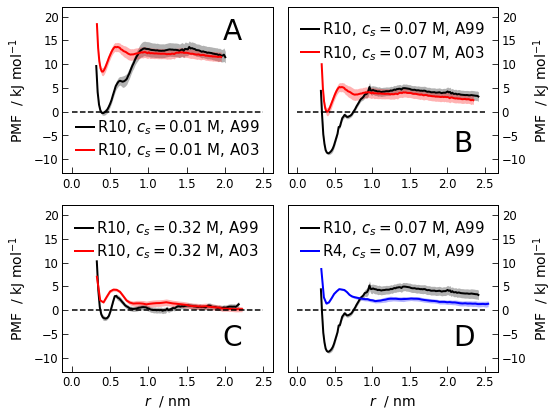

In [18]:
plt.rcParams.update({'font.size': 14, 'figure.figsize': [8.0, 6],'xtick.major.pad':4, 'ytick.major.pad':4,
                     'xtick.major.size':6, 'ytick.major.size':6, 'xtick.direction':'in','ytick.direction':'in'})

def plotPMF(array,subplot,rmax,c='black',w=0,a=0.3,l='',shift=0,ls='-',cs='0',pep='r10',rc='99',ff='a03'):
    """Plots the PMF with a shaded area representing the standard deviations of bootstrapped free energy prfiles.
    The function takes the following arguments:
    - array: PMF vs. distance
    - subplot
    - rmax: upper limit of the distance range
    - c: line color
    - w: line width
    - a: opacity of the shaded area
    - l: legend
    - shift: value by which the PMF is shifted vertically
    - ls: line style
    - cs: ionic strength
    - pep: peptide name
    - rc: residue numbers defining the reaction coordinate
    - ff: force field"""
    path = 'distances/'+cs+'mM/'+pep+'_'+rc+'_'+ff+'/'
    dh = np.loadtxt(path+'dh.dat')
    # find index of largest distance
    maxdh = find_nearest(dh[:,0],rmax)
    maxd = find_nearest(array[:,0],dh[maxdh,0]+.2)
    r = array[:maxd,0]
    #print(array[maxd,0],dh[maxdh,0])
    pmf = array[:maxd,1]+8.3145*0.293*2*np.log(array[:maxd,0])
    pmf = pmf - pmf[-1] + dh[maxdh,1] + shift
    pmfl = pmf - array[:maxd,2]
    pmfu = pmf + array[:maxd,2]
    subplot.fill_between(r,pmfl,pmfu,alpha=a,color=c,lw=0)
    subplot.plot(r,pmf,color=c,lw=w,label=l,linestyle=ls)
    subplot.set_ylabel('PMF  / kJ mol$^{-1}$')
    subplot.legend(loc='best',handlelength=1.2,frameon=False,fontsize=15,handletextpad=0.2)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

plotPMF(pmf_r10_0_99_99,ax1,rmax=2,c='k',w=2,l='R10, $c_s=0.01$ M, A99',cs='0',pep='r10',rc='99',ff='a99')
plotPMF(pmf_r10_60_99_03,ax1,rmax=1.8,c='r',w=2,l='R10, $c_s=0.01$ M, A03',cs='0',pep='r10',rc='99',ff='a03')
ax1.plot( [0,2.5], [0,0], 'k--')

plotPMF(pmf_r10_60_99_99,ax2,rmax=2.1,c='k',w=2,l='R10, $c_s=0.07$ M, A99',cs='60',pep='r10',rc='99',ff='a99')
plotPMF(pmf_r10_60_99_03,ax2,rmax=2,c='r',w=2,l='R10, $c_s=0.07$ M, A03',cs='60',pep='r10',rc='99',ff='a03')
ax2.plot( [0,2.5], [0,0], 'k--')

plotPMF(pmf_r10_300_99_99,ax3,rmax=1.9,c='k',w=2,l='R10, $c_s=0.32$ M, A99',cs='300',pep='r10',rc='99',ff='a99')
plotPMF(pmf_r10_300_99_03,ax3,rmax=2,c='r',w=2,l='R10, $c_s=0.32$ M, A03',cs='300',pep='r10',rc='99',ff='a03')
ax3.set_xlabel('$r$  / nm')
ax3.plot( [0,2.5], [0,0], 'k--')

plotPMF(pmf_r10_60_99_99,ax4,rmax=2.2,c='k',w=2,l='R10, $c_s=0.07$ M, A99',cs='60',pep='r10',rc='99',ff='a99')
plotPMF(pmf_r4_60_33_99,ax4,rmax=2.3,c='b',w=2,l='R4, $c_s=0.07$ M, A99',cs='60',pep='r4',rc='33',ff='a99')
ax4.set_xlabel('$r$  / nm')
ax4.plot( [0,2.5], [0,0], 'k--')

plt.setp(ax1.get_xticklabels(), visible=True)
plt.setp(ax2.get_xticklabels(), visible=True)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")

ax1.set_ylim(-13,22)
ax2.set_ylim(-13,22)
ax3.set_ylim(-13,22)
ax4.set_ylim(-13,22)

plt.figtext(0.40,0.89,'A',size=28)
plt.figtext(0.80,0.63,'B',size=28)
plt.figtext(0.40,0.18,'C',size=28)
plt.figtext(0.80,0.18,'D',size=28)

ax1.yaxis.tick_left()
ax3.yaxis.tick_left()

f.tight_layout()
f.savefig('fig/figS5.pdf')
plt.show()

### Fig. S8

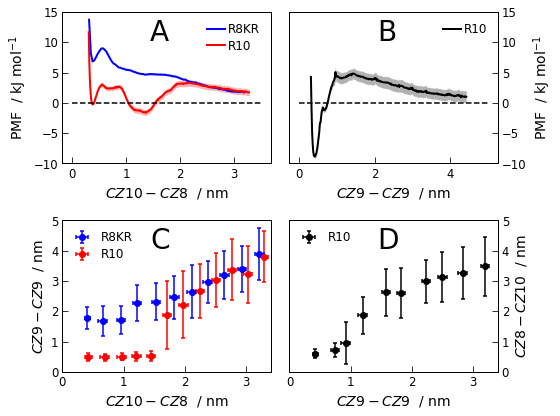

In [19]:
plt.rcParams.update({'font.size': 14, 'figure.figsize': [8.0, 6],'xtick.major.pad':4, 'ytick.major.pad':4,
                     'xtick.major.size':6, 'ytick.major.size':6, 'xtick.direction':'in','ytick.direction':'in'})
    
def plotPMF(array,subplot,c='black',w=0,a=0.3,l='',shift=0,ls='-',cs='0',pep='r10',rc='99',ff='a03'):
    """Plots the PMF with a shaded area representing the standard deviations of bootstrapped free energy prfiles.
    The function takes the following arguments:
    - array: PMF vs. distance
    - subplot
    - rmax: upper limit of the distance range
    - c: line color
    - w: line width
    - a: opacity of the shaded area
    - l: legend
    - shift: value by which the PMF is shifted vertically
    - ls: line style
    - cs: ionic strength
    - pep: peptide name
    - rc: residue numbers defining the reaction coordinate
    - ff: force field"""
    path = 'distances/'+cs+'mM/'+pep+'_'+rc+'_'+ff+'/'
    dh = np.loadtxt(path+'dh.dat')
    # find index of largest distance
    maxdh = find_nearest(dh[:,0],4.4)
    maxd = find_nearest(array[:,0],dh[maxdh,0])
    r = array[:maxd,0]
    pmf = array[:maxd,1]+8.3145*0.293*2*np.log(array[:maxd,0])
    pmf = pmf - pmf[-1] + dh[maxdh,1] + shift
    pmfl = pmf - array[:maxd,2]
    pmfu = pmf + array[:maxd,2]
    subplot.fill_between(r,pmfl,pmfu,alpha=a,color=c,lw=0)
    subplot.plot(r,pmf,color=c,lw=w,label=l,linestyle=ls)
    subplot.set_ylabel('PMF  / kJ mol$^{-1}$')
    subplot.legend(loc='upper right',handlelength=1.5,frameon=False,handletextpad=0.2)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False)

plotPMF(pmf_r8_60_108_99,ax1,c='b',w=2,l='R8KR',cs='60',pep='r8',rc='108',ff='a99')
plotPMF(pmf_r10_60_108_99,ax1,c='r',w=2,l='R10',cs='60',pep='r10',rc='108',ff='a99')

ax1.set_xlabel('$CZ10-CZ8$  / nm')
ax1.plot( [0,3.5], [0,0], 'k--')

plotPMF(pmf_r10_60_99_99,ax2,c='k',w=2,l='R10',cs='60',pep='r10',rc='99',ff='a99')

ax2.set_xlabel('$CZ9-CZ9$  / nm')
ax2.plot( [0,5], [0,0], 'k--')

path = '/Users/giulio/Dropbox/ecis/distances/60mM/'

avg = np.loadtxt(path + 'r8_108_a99/avg.dat')
std = np.loadtxt(path + 'r8_108_a99/std.dat')

ax3.errorbar(avg[:,1],avg[:,0],xerr=std[:,1],yerr=std[:,0],lw=0,marker='o',color='b',
         markeredgecolor='b',ms=6,elinewidth=1.5,capsize=2,capthick=1.5,label='R8KR')
    
avg = np.loadtxt(path + 'r10_108_a99/avg.dat')
std = np.loadtxt(path + 'r10_108_a99/std.dat')

ax3.errorbar(avg[:,1],avg[:,0],xerr=std[:,1],yerr=std[:,0],lw=0,marker='o',color='r',
         markeredgecolor='r',ms=6,elinewidth=1.5,capsize=2,capthick=1.5,label='R10')

ax3.set_xlabel('$CZ10-CZ8$  / nm')
ax3.set_xlim(0,3.4)

avg = np.loadtxt(path + 'r10_99_a99/avg.dat')
std = np.loadtxt(path + 'r10_99_a99/std.dat')

ax4.errorbar(avg[:,0],avg[:,2],xerr=std[:,0],yerr=std[:,2],lw=0,marker='o',color='k',
         markeredgecolor='k',ms=6,elinewidth=1.5,capsize=2,capthick=1.5,label='R10')
ax4.set_xlabel('$CZ9-CZ9$  / nm')
ax4.set_xlim(0,3.4)

plt.setp(ax1.get_xticklabels(), visible=True)
plt.setp(ax2.get_xticklabels(), visible=True)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")

ax1.set_ylim(-10,15)
ax2.set_ylim(-10,15)
ax3.set_ylim(0,5)
ax4.set_ylim(0,5)

ax3.legend(loc='upper left',handlelength=1.5,frameon=False,numpoints=1)
ax4.legend(loc='upper left',handlelength=1.5,frameon=False,numpoints=1)

ax3.set_ylabel('$CZ9-CZ9$  / nm')
ax4.set_ylabel('$CZ8-CZ10$  / nm')

ax1.yaxis.tick_left()
ax3.yaxis.tick_left()

ax1.annotate('A',xy=(0.42,0.81),xycoords='axes fraction',color='k',fontsize=28)
ax2.annotate('B',xy=(0.42,0.81),xycoords='axes fraction',color='k',fontsize=28)
ax3.annotate('C',xy=(0.42,0.81),xycoords='axes fraction',color='k',fontsize=28)
ax4.annotate('D',xy=(0.42,0.81),xycoords='axes fraction',color='k',fontsize=28)

f.tight_layout()
f.savefig('fig/figS8.pdf')
plt.show()

### Fig. S10

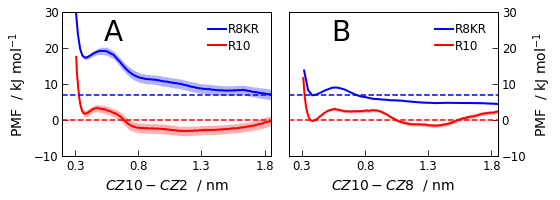

In [20]:
plt.rcParams.update({'font.size': 14, 'figure.figsize': [8.0, 3],'xtick.major.pad':4, 'ytick.major.pad':4,
                     'xtick.major.size':6, 'ytick.major.size':6, 'xtick.direction':'in','ytick.direction':'in'})

f, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False)

plotPMF(pmf_r8_60_102_99,ax1,c='b',w=2,shift=6,l='R8KR',cs='60',pep='r8',rc='108',ff='a99')
plotPMF(pmf_r10_60_102_99,ax1,c='r',w=2,shift=11,l='R10',cs='60',pep='r8',rc='108',ff='a99')
plotPMF(pmf_r8_60_108_99,ax2,c='b',w=2,l='R8KR',cs='60',pep='r8',rc='108',ff='a99')
plotPMF(pmf_r10_60_108_99,ax2,c='r',w=2,l='R10',cs='60',pep='r10',rc='108',ff='a99')

ax1.set_xlim(0.2,1.85)
ax2.set_xlim(0.2,1.85)
ax1.set_ylim(-10,30)
ax2.set_ylim(-10,30)

ax1.plot( [0.2,1.85], [0,0], 'r--')
ax2.plot( [0.2,1.85], [0,0], 'r--')
ax1.plot( [0.2,1.85], [7,7], 'b--')
ax2.plot( [0.2,1.85], [7,7], 'b--')

ax1.set_xlabel('$CZ10-CZ2$  / nm')
ax2.set_xlabel('$CZ10-CZ8$  / nm')

ax1.yaxis.tick_left()

ax1.annotate('A',xy=(0.2,0.8),xycoords='axes fraction',color='k',fontsize=28)
ax2.annotate('B',xy=(0.2,0.8),xycoords='axes fraction',color='k',fontsize=28)

ax1.set_xticks(np.arange(.3,1.9,.5))
ax2.set_xticks(np.arange(.3,1.9,.5))

ax1.set_yticks(np.arange(-10,31,10))
ax2.set_yticks(np.arange(-10,31,10))

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

f.tight_layout()
f.savefig('fig/figS10.pdf')
plt.show()

## PDB analysis

Here we plot the results of the analysis of the PDB. The python script used to search the PDB can be found in the Jupyter Notebook pdb-analysis/pdb-analysis.ipynb

### Fig. 5

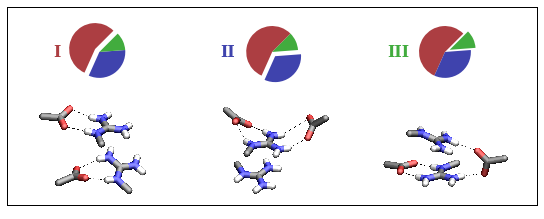

In [21]:
plt.rcParams.update({'font.size': 13, 'figure.figsize': [8.0, 3], 
                     'savefig.dpi': 300, 'axes.linewidth':1., 'font.family':'DejaVu Serif'})

fig = plt.figure()

labels = 'I', 'II', 'III'
fracs = [55.8, 32.9, 11.3]
c = ['#ac3e42','#3f43ad','#42ac3e']

ax2 = plt.axes([.05, .6, .3, .3])
explode=(0.2, 0, 0)
ax2.set_aspect('equal')
ax2.pie(fracs, explode=explode, colors = c,textprops={'weight': 'bold','fontsize':'15'},
                shadow=False, startangle=45,wedgeprops = { 'linewidth' : 0 })

ax2 = plt.axes([.35, .6, .3, .3])
explode=(0, 0.2, 0)
ax2.set_aspect('equal')
ax2.pie(fracs, explode=explode, colors = c,textprops={'weight': 'bold','fontsize':'15'},
                shadow=False, startangle=45,wedgeprops = { 'linewidth' : 0 })

ax2 = plt.axes([.65, .6, .3, .3])
explode=(0, 0, 0.2)
ax2.set_aspect('equal')
ax2.pie(fracs, explode=explode, colors = c,textprops={'weight': 'bold','fontsize':'15'},
                shadow=False, startangle=45,wedgeprops = { 'linewidth' : 0 })

plt.xticks([])
plt.yticks([])
ax2.spines['left'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['bottom'].set_color('white')
ax2.patch.set_alpha(0)

ax1 = plt.axes([-.06, .045, .5, .5])
img=mpimg.imread('fig/4JL5_1.png')
ax1.imshow(img)
plt.xticks([])
plt.yticks([])
ax1.spines['left'].set_color('white')
ax1.spines['right'].set_color('white')
ax1.spines['top'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.patch.set_alpha(0)
    
ax1 = plt.axes([.25, .045, .5, .5])
img=mpimg.imread('fig/4GGD_2.png')
ax1.imshow(img)
plt.xticks([])
plt.yticks([])
ax1.spines['left'].set_color('white')
ax1.spines['right'].set_color('white')
ax1.spines['top'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.patch.set_alpha(0)
    
ax1 = plt.axes([.55, .01, .5, .5])
img=mpimg.imread('fig/4GDX_1.png')
ax1.imshow(img)
plt.xticks([])
plt.yticks([])
ax1.spines['left'].set_color('white')
ax1.spines['right'].set_color('white')
ax1.spines['top'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.patch.set_alpha(0)

plt.figtext(0.12,0.73,'I',size='large',color='#ac3e42',weight='demibold',multialignment='left')
plt.figtext(0.41,0.73,'II',size='large',color='#3f43ad',weight='demibold',multialignment='right')
plt.figtext(0.7,0.73,'III',size='large',color='#42ac3e',weight='demibold',multialignment='right')

ax0 = plt.axes([.04, .04, .92, 0.92])
plt.xticks([])
plt.yticks([])
ax0.patch.set_alpha(0)

ax1.yaxis.tick_left()
ax1.xaxis.tick_bottom()
ax3.yaxis.tick_right()
ax3.xaxis.tick_bottom()

#plt.axvline(x=1/6,ymin=.04,ymax=.92,color='black',lw=1)
#plt.axvline(x=3/6,ymin=.04,ymax=.92,color='black',lw=1)
#plt.axvline(x=5/6,ymin=.04,ymax=.92,color='red',lw=1)

plt.savefig('fig/fig5.pdf')

plt.show()

Here MD trajectories where two peptides are kept at close separation are loaded.

In [22]:
r10_cz = np.array([209,452]).reshape(1,2)

trl99 = md.load('r10lstckd/r10lstckd_99.xtc', top='r10lstckd/r10lstckd.pdb')
hbrl99 = md.wernet_nilsson(trl99[:], periodic=False)
czrl99 = md.compute_distances(trl99, r10_cz)

trm99 = md.load('r10mstckd/r10mstckd_99.xtc', top='r10mstckd/r10mstckd_99.pdb')
hbrm99 = md.wernet_nilsson(trm99[:],periodic=False)
czrm99 = md.compute_distances(trm99, r10_cz)

trh99 = md.load('r10hstckd/r10hstckd_99.xtc', top='r10hstckd/r10hstckd_99.pdb')
hbrh99 = md.wernet_nilsson(trh99[:],periodic=False)
czrh99 = md.compute_distances(trh99, r10_cz)

trl = md.load('r10lstckd/r10lstckd.xtc', top='r10lstckd/r10lstckd.pdb')
hbrl = md.wernet_nilsson(trl[:],periodic=False)
czrl = md.compute_distances(trl, r10_cz)

trm = md.load('r10mstckd/r10mstckd.xtc', top='r10mstckd/r10mstckd.pdb')
hbrm = md.wernet_nilsson(trm[:],periodic=False)
czrm = md.compute_distances(trm, r10_cz)

trh = md.load('r10hstckd/r10hstckd.xtc', top='r10hstckd/r10hstckd.pdb')
hbrh = md.wernet_nilsson(trh[:],periodic=False)
czrh = md.compute_distances(trh, r10_cz)

k10_ce = np.array([191,414]).reshape(1,2)

tkh = md.load('k10hstckd/k10hstckd.xtc', top='k10hstckd/k10hstckd.pdb')
hbkh = md.wernet_nilsson(tkh[:],periodic=False)
cekh = md.compute_distances(tkh, k10_ce)

tkm = md.load('k10mstckd/k10mstckd.xtc', top='k10mstckd/k10mstckd.pdb')
hbkm = md.wernet_nilsson(tkm[:],periodic=False)
cekm = md.compute_distances(tkm, k10_ce)

tkl = md.load('k10lstckd/k10lstckd.xtc', top='k10lstckd/k10lstckd.pdb')
hbkl = md.wernet_nilsson(tkl[:],periodic=False)
cekl = md.compute_distances(tkl, k10_ce)

## Hydrogen bond probabilities - AMBER ff03WS
### Fig. 3

(11559, 4251, 11602, 11801, 2251, 7001)
(10.0, 40.0, 19740.0, 10.0, 40.0, 10.0)
ARG10-O
ARG10-OXT
ARG10-O
ARG10-OXT
('max', 0.84797975390522728, 0.99735003613587092, 0.52521300643366375)
('min', 0.0, 0.0, 0.0)
LYS10-O
LYS10-OXT
LYS20-O
LYS20-OXT
('max', 0.20459789761558841, 0.22733612273361228, 0.20113027097522099)
('min', 0.0, 0.0, 0.0)


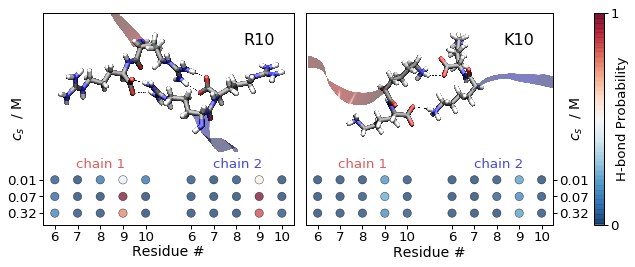

In [23]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8.7, 3.5], 'font.family':'DejaVu Sans',
                     'savefig.dpi': 600, 'legend.fontsize': 'small', 'legend.frameon': False,
                     'legend.numpoints':1,'xtick.direction':'out','ytick.direction':'out',
                     'axes.linewidth':1.,'xtick.labelsize':'small','ytick.labelsize':'small',
                     'axes.labelsize':14,'xtick.major.pad':2, 'ytick.major.pad':2})

print(trh.n_frames,trm.n_frames,trl.n_frames,tkh.n_frames,tkm.n_frames,tkl.n_frames)
print(trh.timestep,trm.timestep,trl.timestep,tkh.timestep,tkm.timestep,tkl.timestep)
fig = plt.figure()
from pylab import cm,clabel,colorbar

for i in [241,242,484,485]:
    print(trh.topology.atom(i))

def Phb(t,hb,cz):
    tot = np.zeros(11)
    w_tot = 0
    hb = np.array(hb)
    cz = np.array(cz)
    for i,d in zip(hb[100:],cz[100:]):
        frame = np.zeros(11)
        weight = 1 #np.exp(500./.293/8.3145*.5*(cz[0][0]-d)**2)
        for j in i:
            if((j[2]==484 or j[2]==485) and (5 <= t.topology.atom(j[0]).residue.index < 10)):
                if (frame[t.topology.atom(j[0]).residue.index-5]<1):
                    #print(t.topology.atom(j[0]))
                    frame[t.topology.atom(j[0]).residue.index-5]+=weight
            if((j[2]==241 or j[2]==242) and (15 <= t.topology.atom(j[0]).residue.index < 20)):
                if (frame[t.topology.atom(j[0]).residue.index-9]<1):
                    #print(t.topology.atom(j[0]))
                    frame[t.topology.atom(j[0]).residue.index-9]+=weight
        tot = tot + frame
        w_tot += weight
    return tot/w_tot

a = Phb(trh,hbrh,czrh)
b = Phb(trm,hbrm,czrm)
c = Phb(trl,hbrl,czrl)
print('max',a.max(),b.max(),c.max())
print('min',a.min(),b.min(),c.min())
z = [None]*(len(a)+len(b)+len(c))
z[::3] = a
z[1::3] = b
z[2::3] = c
x = np.repeat(np.arange(1,12,1),3)
y = np.tile(np.arange(1,4,1),11)

ax0 = plt.axes([-.015, .42, .55,.55])
img=mpimg.imread('fig/r10l_hbonds.png')
ax0.imshow(img)
plt.xticks([])
plt.yticks([])
xticks = np.arange(0,6,1)
ax0.spines['bottom'].set_color('white')
ax0.spines['top'].set_color('white') 
ax0.spines['right'].set_color('white')
ax0.spines['left'].set_color('white')

ax3 = plt.axes([0.445, .45, .465, .465])
img=mpimg.imread('fig/k10l_hbonds.png')
ax3.imshow(img)
plt.xticks([])
plt.yticks([])
xticks = np.arange(0,6,1)
ax3.spines['bottom'].set_color('white')
ax3.spines['top'].set_color('white') 
ax3.spines['right'].set_color('white')
ax3.spines['left'].set_color('white')

ax1 = plt.axes([.06, .13, .40, 0.84])
sc = plt.scatter(x,y,c=z,cmap=cm.RdBu_r,s=70,lw=0.5,vmin=0,vmax=1,alpha=0.7,edgecolors='k')
labels = ['6', '7', '8', '9','10','6', '7', '8', '9','10']
plt.xticks([1,2,3,4,5,7,8,9,10,11],labels)
labels = ['0.32','0.07','0.01']
plt.yticks(np.arange(1,4,1),labels)
plt.ylim(0.3,13)
plt.xlabel('Residue #',labelpad=1,fontsize=14)
plt.ylabel('$c_s$  / M',labelpad=-20)
ax1.patch.set_alpha(0)
ax1.tick_params('y', length=4, width=1, which='major')
ax1.tick_params('x', length=4, width=1, which='major')

for i in [221,222,444,445]:
    print(tkh.topology.atom(i))

def Phb(t,hb,ce):
    tot = np.zeros(11)
    w_tot = 0
    hb = np.array(hb)
    ce = np.array(ce)
    for i,d in zip(hb[100:],ce[100:]):
        frame = np.zeros(11)
        weight = 1 #np.exp(500./.293/8.3145*.5*(ce[0][0]-d)**2)
        for j in i:
            if((j[2]==444 or j[2]==445) and (5 <= t.topology.atom(j[0]).residue.index < 10)):
                if (frame[t.topology.atom(j[0]).residue.index-5]<1):
                    #print(t.topology.atom(j[0]))
                    frame[t.topology.atom(j[0]).residue.index-5]+=weight
            if((j[2]==221 or j[2]==222) and (15 <= t.topology.atom(j[0]).residue.index < 20)):
                if (frame[t.topology.atom(j[0]).residue.index-9]<1):
                    #print(t.topology.atom(j[0]))
                    frame[t.topology.atom(j[0]).residue.index-9]+=weight
        tot = tot + frame
        w_tot += weight
    return tot/w_tot

a = Phb(tkh,hbkh,cekh)
b = Phb(tkm,hbkm,cekm)
c = Phb(tkl,hbkl,cekl)
print('max',a.max(),b.max(),c.max())
print('min',a.min(),b.min(),c.min())
z = [None]*(len(a)+len(b)+len(c))
z[::3] = a
z[1::3] = b
z[2::3] = c
x = np.repeat(np.arange(1,12,1),3)
y = np.tile(np.arange(1,4,1),11)

ax2 = plt.axes([.48, .13, .54, 0.84])

sc = plt.scatter(x,y,c=z, cmap=cm.RdBu_r,s=70,lw=0.5,vmin=0,vmax=1,alpha=0.7,edgecolors='k')
labels = ['6', '7', '8', '9','10','6', '7', '8', '9','10']
plt.xticks([1,2,3,4,5,7,8,9,10,11],labels)
labels = ['0.32','0.07','0.01']
ax2.yaxis.tick_right() 
plt.yticks(np.arange(1,4,1),labels)
ax2.yaxis.set_label_position("right")
plt.ylim(0.3,13)
plt.xlabel('Residue #',labelpad=2,fontsize=14)
plt.ylabel('$c_s$  / M',labelpad=-20)
cb = colorbar(sc,pad=0.12)
cb.set_label('H-bond Probability',size='small',labelpad=-3)
cb.set_ticks((0,1))
cb.ax.tick_params(axis='both', length=4, width=1.)
ax2.patch.set_alpha(0)
ax2.tick_params('y', length=4, width=1, which='major')
ax2.tick_params('x', length=4, width=1, which='major')

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
ax2.xaxis.tick_bottom()

ax1.add_patch(mpl.patches.Rectangle((5.7,0),0.6,3.6,color='white'))
ax2.add_patch(mpl.patches.Rectangle((5.7,0),0.6,3.6,color='white'))

ax1.annotate('R10',xy=(0.8,0.85),xycoords='axes fraction',color='k',fontsize='medium')
ax2.annotate('K10',xy=(0.8,0.85),xycoords='axes fraction',color='k',fontsize='medium')

ax1.annotate('chain 1',xy=(0.13,0.27),xycoords='axes fraction',color='#de5c5c',fontsize='small')
ax2.annotate('chain 1',xy=(0.13,0.27),xycoords='axes fraction',color='#de5c5c',fontsize='small')
ax1.annotate('chain 2',xy=(0.68,0.27),xycoords='axes fraction',color='#4949d3',fontsize='small')
ax2.annotate('chain 2',xy=(0.68,0.27),xycoords='axes fraction',color='#4949d3',fontsize='small')

plt.savefig('fig/fig3.pdf')

## Hydrogen bond probabilities - AMBER ff99SB-ILDN
### Fig. S6

(11559, 4251, 11602, 11801, 2251, 7001)
(10.0, 40.0, 19740.0, 10.0, 40.0, 10.0)
ARG10-O
ARG10-OXT
ARG10-O
ARG10-OXT
('max', 1.0, 0.99950641658440276, 0.9965449160908193)
('min', 0.0, 0.0, 0.0)
('Average CZ9-CZ9:', 0.42199999999999999, '+/-', 0.040000000000000001, 'nm')


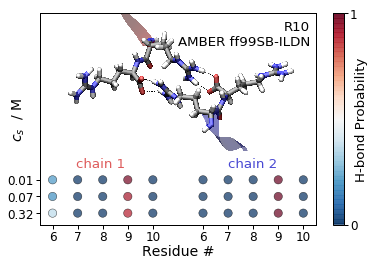

In [24]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [6, 3.5], 
                     'savefig.dpi': 600, 'legend.fontsize': 'small', 'legend.frameon': False,
                     'legend.numpoints':1,'xtick.direction':'out','ytick.direction':'out',
                     'axes.linewidth':1.,'xtick.labelsize':12,'ytick.labelsize':12,
                     'axes.labelsize':14,'xtick.major.pad':2, 'ytick.major.pad':2})

print(trh.n_frames,trm.n_frames,trl.n_frames,tkh.n_frames,tkm.n_frames,tkl.n_frames)
print(trh.timestep,trm.timestep,trl.timestep,tkh.timestep,tkm.timestep,tkl.timestep)
fig = plt.figure()
from pylab import cm,clabel,colorbar

for i in [241,242,484,485]:
    print(trh.topology.atom(i))

def Phb(t,hb,cz):
    tot = np.zeros(11)
    w_tot = 0
    hb = np.array(hb)
    cz = np.array(cz)
    for i,d in zip(hb[100:],cz[100:]):
        frame = np.zeros(11)
        weight = 1 #np.exp(500./.293/8.3145*.5*(cz[0][0]-d)**2)
        for j in i:
            if((j[2]==484 or j[2]==485) and (5 <= t.topology.atom(j[0]).residue.index < 10)):
                if (frame[t.topology.atom(j[0]).residue.index-5]<1):
                    #print(t.topology.atom(j[0]))
                    frame[t.topology.atom(j[0]).residue.index-5]+=weight
            if((j[2]==241 or j[2]==242) and (15 <= t.topology.atom(j[0]).residue.index < 20)):
                if (frame[t.topology.atom(j[0]).residue.index-9]<1):
                    #print(t.topology.atom(j[0]))
                    frame[t.topology.atom(j[0]).residue.index-9]+=weight
        tot = tot + frame
        w_tot += weight
    return tot/w_tot

a = Phb(trh99,hbrh99,czrh99)
b = Phb(trm99,hbrm99,czrm99)
c = Phb(trl99,hbrl99,czrl99)
print('max',a.max(),b.max(),c.max())
print('min',a.min(),b.min(),c.min())
z = [None]*(len(a)+len(b)+len(c))
z[::3] = a
z[1::3] = b
z[2::3] = c
x = np.repeat(np.arange(1,12,1),3)
y = np.tile(np.arange(1,4,1),11)

ax0 = plt.axes([0.15, .378, .64,.64])
img=mpimg.imread('fig/r10l_hbonds.png')
ax0.imshow(img)
plt.xticks([])
plt.yticks([])
xticks = np.arange(0,6,1)
ax0.spines['bottom'].set_color('white')
ax0.spines['top'].set_color('white') 
ax0.spines['right'].set_color('white')
ax0.spines['left'].set_color('white')

ax1 = plt.axes([.15, .13, .8, 0.84])
sc = plt.scatter(x,y,c=z,cmap=cm.RdBu_r,s=70,lw=0.5,vmin=0,vmax=1,alpha=0.7,edgecolors='k')
labels = ['6', '7', '8', '9','10','6', '7', '8', '9','10']
plt.xticks([1,2,3,4,5,7,8,9,10,11],labels)
labels = ['0.32','0.07','0.01']
plt.yticks(np.arange(1,4,1),labels)
plt.ylim(0.3,13)
plt.xlabel('Residue #',labelpad=1,fontsize=14)
plt.ylabel('$c_s$  / M',labelpad=-20)
ax1.patch.set_alpha(0)
ax1.tick_params('y', length=4, width=1, which='major')
ax1.tick_params('x', length=4, width=1, which='major')


cb = colorbar(sc)
cb.set_label('H-bond Probability',size='small',labelpad=-3)
cb.set_ticks((0,1))
cb.ax.tick_params(axis='both', length=4, width=1.)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
ax1.add_patch(mpl.patches.Rectangle((5.7,0),0.6,3.6,color='white'))

ax1.annotate('R10\nAMBER ff99SB-ILDN',xy=(0.5,0.85),xycoords='axes fraction',color='k',
             fontsize='small',multialignment='right')
ax1.annotate('chain 1',xy=(0.13,0.27),xycoords='axes fraction',color='#de5c5c',fontsize='small')
ax1.annotate('chain 2',xy=(0.68,0.27),xycoords='axes fraction',color='#4949d3',fontsize='small')

plt.savefig('fig/figS6.pdf')

r10_60_99_rc = np.loadtxt('distances/60mM/r10_99_a99/dh.dat',usecols=(0,2))
print('Average CZ9-CZ9:',r10_60_99_rc[0,0],'+/-',r10_60_99_rc[0,1],'nm')

## Relative orientation of peptides at close separation
### Fig. S3

(ARG1-CA, ARG10-C, array([[247, 483]], dtype=int32))
('Number of frames: ', 11601, '... timestep: ', 10.0)
('Volume: ', '1215.32', ' nm^3')
('Ionic Strength: ', '13.66', ' mM')
('c_s: ', '0.00', ' mM')
------------------------
(ARG1-CA, ARG10-C, array([[247, 483]], dtype=int32))
('Number of frames: ', 4251, '... timestep: ', 40.0)
('Volume: ', '1220.08', ' nm^3')
('Ionic Strength: ', '70.77', ' mM')
('c_s: ', '57.16', ' mM')
------------------------
(ARG1-CA, ARG10-C, array([[247, 483]], dtype=int32))
('Number of frames: ', 11559, '... timestep: ', 10.0)
('Volume: ', '1206.31', ' nm^3')
('Ionic Strength: ', '315.24', ' mM')
('c_s: ', '301.47', ' mM')
------------------------
(LYS11-CA, LYS20-C, array([[227, 443]], dtype=int32))
('Number of frames: ', 7001, '... timestep: ', 10.0)
('Volume: ', '1202.25', ' nm^3')
('Ionic Strength: ', '13.81', ' mM')
('c_s: ', '0.00', ' mM')
------------------------
(LYS11-CA, LYS20-C, array([[227, 443]], dtype=int32))
('Number of frames: ', 2251, '... t

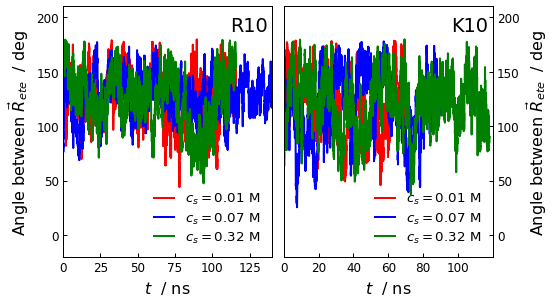

In [25]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8.0, 4.5],'font.family':'DejaVu Sans',
                     'savefig.dpi': 300, 'legend.fontsize': 'small', 'legend.frameon': False,
                     'legend.numpoints':1,'xtick.direction':'in','ytick.direction':'in',
                     'axes.linewidth':1.0,'xtick.labelsize':12,'ytick.labelsize':12,
                     'axes.labelsize':'medium','xtick.major.pad':4, 'ytick.major.pad':4})

def angle(t,subplot,s1='index 4',s2='index 240',s3='index 247',s4='index 483',c='blue',l=''):
    ends1 = t.topology.select_pairs(selection1=s1, selection2=s2)
    ends2 = t.topology.select_pairs(selection1=s3, selection2=s4)
    ete1 = md.compute_displacements(t,ends1)
    ete2 = md.compute_displacements(t,ends2)
    print(t.topology.atom(ends2[0][0]), t.topology.atom(ends2[0][1]), ends2)
    ions = t.topology.select('name CL or name NA')
    na = t.topology.select('name NA')
    vol = 0.707*(t.unitcell_lengths.mean())**3
    print('Number of frames: ',t.n_frames,'... timestep: ',t.timestep)
    print('Volume: ','{:1.2f}'.format(vol),' nm^3')
    Is = len(ions)/6.022/vol*1e4/2
    cs = len(na)/6.022/vol*1e4
    print('Ionic Strength: ','{:1.2f}'.format(Is),' mM') 
    print('c_s: ','{:1.2f}'.format(cs),' mM')
    print('------------------------')
    def angle_between(v1, v2):
        def unit_vector(vector):
            return vector / np.linalg.norm(vector)
        array = np.empty((0,1))
        for i in np.arange(0,v1.shape[0],1):
            v1_u = unit_vector(v1[i][0])
            v2_u = unit_vector(v2[i][0])
            array = np.append(array,[[np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))/np.pi*180]],axis=0)
        return array
    subplot.plot(np.arange(0,t.n_frames,1)*t.timestep*1e-3,angle_between(ete1,ete2),color=c,label=l,lw=2)
    subplot.set_xlabel('$t$  / ns')
    subplot.set_ylim(-20,210)
    subplot.set_ylabel(r'Angle between $\vec R_{ete}$  / deg')
    
f, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False)
    
#ax1 = plt.axes([.09, .13, .4, 0.83])
angle(trl[1:],ax1,c='red',l='$c_s=0.01$ M')
angle(trm,ax1,c='blue',l='$c_s=0.07$ M')
angle(trh,ax1,c='green',l='$c_s=0.32$ M')
ax1.legend(frameon=False,loc='lower right',handlelength=1.5)
ax1.set_xlim(0,140)
ax1.set_xticks(np.arange(0,140,25))

#ax2 = plt.axes([.51, .13, .4, 0.83])
angle(tkl,ax2,s1='index 4',s2='index 220',s3='index 227',s4='index 443',c='red',l='$c_s=0.01$ M')
angle(tkm,ax2,s1='index 4',s2='index 220',s3='index 227',s4='index 443',c='blue',l='$c_s=0.07$ M')
angle(tkh,ax2,s1='index 4',s2='index 220',s3='index 227',s4='index 443',c='green',l='$c_s=0.32$ M')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xlim(0,120)
ax2.set_xticks(np.arange(0,120,20))

ax1.tick_params('both', length=4, width=1., which='major')
ax2.tick_params('both', length=4, width=1., which='major')

ax1.yaxis.tick_left()
ax1.xaxis.tick_bottom()
ax2.yaxis.tick_right()
ax2.xaxis.tick_bottom()

ax1.annotate('R10',xy=(0.8,0.9),xycoords='axes fraction',color='k',fontsize='large')
ax2.annotate('K10',xy=(0.8,0.9),xycoords='axes fraction',color='k',fontsize='large')

ax2.legend(frameon=False,loc='lower right',handlelength=1.5)
plt.tight_layout(w_pad=0.5)
plt.savefig('fig/figS3.pdf')
plt.show()

## Coordination with Chloride Ions
### Fig. S9

(66, 0.52644487944516272, 6, 16, 0.505)
(79, 0.71667802875692199, 7, 19, 0.505)
(88, 0.41040573336861352, 8, 18, 0.505)
(93, 0.64364071325822314, 9, 13, 0.505)
(96, 0.57156181877309631, 9, 16, 0.505)


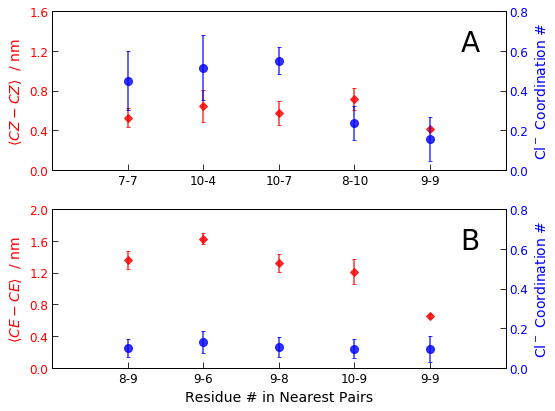

In [26]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8, 6], 
                     'savefig.dpi': 600, 'legend.fontsize': 'small', 'legend.frameon': False,
                     'legend.numpoints':1, 'axes.linewidth':1.0,
                     'axes.linewidth':1.,'xtick.labelsize':12,'ytick.labelsize':12,
                     'axes.labelsize':14, 'xtick.major.pad':4, 'ytick.major.pad':4,
                     'xtick.direction':'in','ytick.direction':'in'})
def rhocl(t):
    vol = 0.707*(t.unitcell_lengths.mean())**3
    return len(t.topology.select('name CL'))/vol

f, (ax1,ax3) = plt.subplots(2, 1, sharex=False, sharey=False)

rr = [.2,1]
uplim = int(1e2*(.5-rr[0]))

for t in [trm]:
    rho_cl = rhocl(t)
    n_fr = int(t.n_frames/10.)
    dist = np.empty(0)
    dist_err = np.empty(0)
    cnum = np.empty(0)
    cnum_err = np.empty(0)
    cnt = 0
    for res1 in range(0,10):
        cz1 = t.topology.select('resid '+str(res1)+' and name CZ')
        for res2 in range(10,20):
            cz2 = t.topology.select('resid '+str(res2)+' and name CZ')
            pairs = t.topology.select_pairs(t.topology.select('name CL'),np.append(cz1,cz2))
            czcz = t.top.select_pairs(cz1,cz2)
            cnum_fr = np.empty(0)
            dist_fr = np.empty(0)
            for i in np.arange(0,t.n_frames,n_fr,dtype=int):
                r,gr = md.compute_rdf(t[i:i+n_fr],pairs,r_range=rr,bin_width=0.01)
                cnum_fr = np.append(cnum_fr,rho_cl*np.trapz(gr[:uplim]*4.*np.pi*r[:uplim]*r[:uplim],r[:uplim]))
                dist_fr = np.append(dist_fr,md.compute_distances(t[i:i+n_fr], czcz).mean())
            cnum = np.append(cnum,np.average(cnum_fr))
            cnum_err = np.append(cnum_err,np.std(cnum_fr))
            dist = np.append(dist,np.average(dist_fr))
            dist_err = np.append(dist_err,np.std(dist_fr))
            if (cnt in [66,93,96,79,88]):
                print(cnt,np.average(dist_fr),res1,res2,r[uplim])
            cnt += 1
    dist_stkd = np.array([dist[66],dist[93],dist[96],dist[79],dist[88]])
    cnum_stkd = np.array([cnum[66],cnum[93],cnum[96],cnum[79],cnum[88]])
    dist_stkd_err = np.array([dist_err[66],dist_err[93],dist_err[96],dist_err[79],dist_err[88]])
    cnum_stkd_err = np.array([cnum_err[66],cnum_err[93],cnum_err[96],cnum_err[79],cnum_err[88]])
    ax1.errorbar(range(0,5),dist_stkd,dist_stkd_err,color='r',lw=0,marker='D',
             markeredgecolor='r',alpha=0.8,markersize=6,elinewidth=1.5,capsize=2,capthick=1.)
    #ax1.set_xlabel('residue #')
    ax1.set_ylabel(r'$\langle CZ-CZ \rangle$  / nm', color='r')
    ax1.set_ylim(0,1.6)
    for tl in ax1.get_yticklabels():
        tl.set_color('r')
    ax2 = ax1.twinx()
    ax2.set_ylim(0,.8)
    ax2.errorbar(range(0,5),cnum_stkd,cnum_stkd_err,color='b',lw=0,marker='o',
             markeredgecolor='b',alpha=0.8,markersize=8,elinewidth=1.5,capsize=2,capthick=1.)
    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel('Cl$^-$ Coordination #', color='b')
    for tl in ax2.get_yticklabels():
        tl.set_color('b')
    labels = ['7-7','10-4','10-7','8-10','9-9']
    plt.xticks(range(0,5),labels)
    ax1.set_yticks(np.arange(0,1.7,.4))
    ax2.set_yticks(np.arange(0,.9,.2))
    plt.xlim(-1,5)

for t in [tkl]:
    rho_cl = rhocl(t)
    n_fr = int(t.n_frames/10.)
    dist = np.empty(0)
    dist_err = np.empty(0)
    cnum = np.empty(0)
    cnum_err = np.empty(0)
    cnt = 0
    for res1 in range(0,10):
        ce1 = t.topology.select('resid '+str(res1)+' and name CE')
        for res2 in range(10,20):
            ce2 = t.topology.select('resid '+str(res2)+' and name CE')
            pairs = t.topology.select_pairs(t.topology.select('name CL'),np.append(ce1,ce2))
            cece = t.top.select_pairs(ce1,ce2)
            cnum_fr = np.empty(0)
            dist_fr = np.empty(0)
            for i in np.arange(0,t.n_frames,n_fr,dtype=int):
                r,gr = md.compute_rdf(t[i:i+n_fr],pairs,r_range=rr,bin_width=0.01)
                cnum_fr = np.append(cnum_fr,rho_cl*np.trapz(gr[:uplim]*4.*np.pi*r[:uplim]*r[:uplim],r[:uplim]))
                dist_fr = np.append(dist_fr,md.compute_distances(t[i:i+n_fr], cece).mean())
            cnum = np.append(cnum,np.average(cnum_fr))
            cnum_err = np.append(cnum_err,np.std(cnum_fr))
            dist = np.append(dist,np.average(dist_fr))
            dist_err = np.append(dist_err,np.std(dist_fr))
            #print(cnt,np.average(dist_fr),res1,res2,r[uplim])
            cnt += 1
    dist_stkd = np.array([dist[78],dist[85],dist[87],dist[98],dist[88]])
    cnum_stkd = np.array([cnum[78],cnum[85],cnum[87],cnum[98],cnum[88]])
    dist_stkd_err = np.array([dist_err[78],dist_err[85],dist_err[87],dist_err[98],dist_err[88]])
    cnum_stkd_err = np.array([cnum_err[78],cnum_err[85],cnum_err[87],cnum_err[98],cnum_err[88]])
    ax3.errorbar(range(0,5),dist_stkd,dist_stkd_err,color='r',lw=0,marker='D',
             markeredgecolor='r',alpha=0.8,markersize=6,elinewidth=1.5,capsize=2,capthick=1.)
    ax3.set_xlabel('Residue # in Nearest Pairs')
    ax3.set_ylabel(r'$\langle CE-CE \rangle$  / nm', color='r')
    ax3.set_ylim(0,2)
    for tl in ax3.get_yticklabels():
        tl.set_color('r')
    ax4 = ax3.twinx()
    ax4.set_ylim(0,.8)
    ax4.errorbar(range(0,5),cnum_stkd,cnum_stkd_err,color='b',lw=0,marker='o',
             markeredgecolor='b',alpha=0.8,markersize=8,elinewidth=1.5,capsize=2,capthick=1.)
    ax4.yaxis.set_label_position("right")
    ax4.set_ylabel('Cl$^-$ Coordination #', color='b')
    for tl in ax4.get_yticklabels():
        tl.set_color('b')
    labels = ['8-9','9-6','9-8','10-9','9-9']
    plt.xticks(range(0,5),labels)
    ax3.set_yticks(np.arange(0,2.1,.4))
    ax4.set_yticks(np.arange(0,.9,.2))
    plt.xlim(-1,5)
    ax1.annotate('A',xy=(0.9,0.75),xycoords='axes fraction',color='k',fontsize=28)
    ax3.annotate('B',xy=(0.9,0.75),xycoords='axes fraction',color='k',fontsize=28)
plt.tight_layout()
plt.savefig('fig/figS9.pdf')
plt.show()

## PMFs $vs.$ c.o.m.-c.o.m.
### Fig. S7

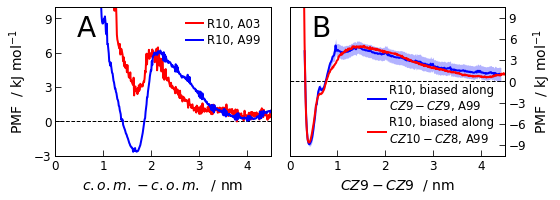

In [27]:
plt.rcParams.update({'font.size': 14, 'figure.figsize': [8.0, 3], 'font.family':'DejaVu Sans',
                     'xtick.major.pad':4, 'ytick.major.pad':4,
                     'xtick.major.size':6, 'ytick.major.size':6, 'xtick.direction':'in','ytick.direction':'in'})

f, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False)

ax1.plot( [0,4.5], [0,0], 'k--', lw=1)
ax2.plot( [0,4.5], [0,0], 'k--', lw=1)

path = workdir+'/distances/60mM/r10_99_a03/dist/'
r,pmf,pmf_err = np.loadtxt(path+'pmfy-com.dat',unpack=True)
idx = find_nearest(r,4.4)
ax1.plot(r,(pmf-pmf[idx])*.293*8.3145+DH(r[idx],71),lw=2,color='r',label='R10, A03')
path = workdir+'/distances/60mM/r10_108_a99/dist/'
r,pmf,pmf_err = np.loadtxt(path+'pmfy-com.dat',unpack=True)
idx = find_nearest(r,4.4)
pmf_u = ( pmf - pmf[idx] + pmf_err - pmf_err[idx])*.293*8.3145 + DH(r[idx],71)
pmf_l = ( pmf - pmf[idx] - pmf_err + pmf_err[idx])*.293*8.3145 + DH(r[idx],71)
ax1.plot(r,(pmf-pmf[idx])*.293*8.3145+DH(r[idx],71),lw=2,color='b',label='R10, A99')
ax1.fill_between(r,pmf_l,pmf_u,alpha=.3,color='b',lw=0)

path = workdir+'/distances/60mM/r10_108_a99/dist/'
r,pmf,pmf_err = np.loadtxt(path+'pmfy-99.dat',unpack=True)
plotPMF(pmf_r10_60_99_99,ax2,'b',2,ls='-',cs='60',pep='r10',rc='99',ff='a99',l='R10, biased along\n$CZ9-CZ9$, A99')
pmf_u = ( pmf - pmf[idx] + pmf_err - pmf_err[idx])*.293*8.3145 + DH(r[idx],71)
pmf_l = ( pmf - pmf[idx] - pmf_err + pmf_err[idx])*.293*8.3145 + DH(r[idx],71)
pmf_m = ( pmf - pmf[idx] )*.293*8.3145 + DH(r[idx],71)
ax2.plot(r,pmf_m,lw=2,color='r',label='R10, biased along\n$CZ10-CZ8$, A99')
ax2.fill_between(r,pmf_l,pmf_u,alpha=.3,color='r',lw=0)

ax1.set_xlim(0,4.5)
ax2.set_xlim(0,4.5)
ax1.set_ylim(-2,10)
ax2.set_ylim(-10.5,10.5)

ax1.set_xlabel('$c.o.m.-c.o.m.$  / nm')
ax2.set_xlabel('$CZ9-CZ9$  / nm')
ax1.set_ylabel('PMF  / kJ mol$^{-1}$')
ax2.set_ylabel('PMF  / kJ mol$^{-1}$')

ax1.yaxis.tick_left()

ax1.annotate('A',xy=(0.1,0.8),xycoords='axes fraction',color='k',fontsize=28)
ax2.annotate('B',xy=(0.1,0.8),xycoords='axes fraction',color='k',fontsize=28)

ax1.set_xticks(np.arange(0,5,1))
ax2.set_xticks(np.arange(0,5,1))

ax1.set_yticks(np.arange(-3,11,3))
ax2.set_yticks(np.arange(-9,11,3))

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

ax1.legend(loc='upper right',handlelength=1.5,frameon=False,handletextpad=0.3)
ax2.legend(loc='lower right',handlelength=1.5,frameon=False,handletextpad=0.3)

f.tight_layout()
f.savefig('fig/figS7.pdf')
plt.show()

## Estimate of $K_D$

In [28]:
def Kd_plot(path,l,rc):
    r, pmf, pmf_err = np.loadtxt(path+'pmfy-com.dat',unpack=True)
    idx = find_nearest(r,4.4)
    x = np.arange( r[idx+1], 100, r[1]-r[0] )
    pmf_m = np.append( ( pmf[:idx] - pmf[idx] )*.293*8.3145 + DH(r[idx],71), DH(x,71) )
    pmf_u = np.append( ( pmf[:idx] - pmf[idx] + pmf_err[:idx] - pmf_err[idx])*.293*8.3145 + DH(r[idx],71), DH(x,71) )
    pmf_l = np.append( ( pmf[:idx] - pmf[idx] - pmf_err[:idx] + pmf_err[idx])*.293*8.3145 + DH(r[idx],71), DH(x,71) )
    r = np.append(r[:idx],x)
    noninf = pmf_m.size - np.where(~np.isinf(pmf_m))[0].size
    pmf_m = pmf_m[noninf:]
    pmf_u = pmf_u[noninf:]
    pmf_l = pmf_l[noninf:]
    r = r[noninf:]
    plt.plot(r,pmf_m,lw=3,color='k')
    plt.xlim(.8,4.2)
    plt.xlabel('$c.o.m.-c.o.m.$  / nm')
    plt.ylabel('PMF  / kJ mol$^{-1}$')
    plt.show()
    def Kd_estimate(r,pmf,rc):
        RT=8.3145*.293
        idx = find_nearest(r,rc)
        int1 = np.trapz(r[:idx]*r[:idx]*np.exp(-pmf[:idx]/RT),r[:idx])
        int2 = np.trapz(r[idx+1:]*r[idx+1:]*np.exp(-pmf[idx+1:]/RT),r[idx+1:])
        return int2/int1/(4/3.*np.pi*np.power(r[-1],3))/6.022*10000
    Kd = Kd_estimate(r,pmf_m,rc)
    Kd_u = Kd_estimate(r,pmf_u,rc)
    Kd_l = Kd_estimate(r,pmf_l,rc)
    print(l+', Kd = {:1.0f}'.format(Kd),'+/- {:1.0f}'.format(abs(Kd_u-Kd_l)/2.),' mM')

#### AMBER ff03WS

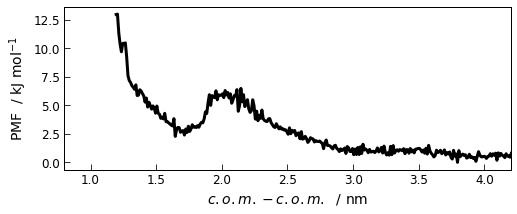

('R10, AMBER ff03W, Kd = 352', '+/- 3', ' mM')


In [29]:
path = workdir+'/distances/60mM/r10_99_a03/dist/'
Kd_plot(path,l='R10, AMBER ff03W',rc=2)

#### AMBER ff99SB-ILDN

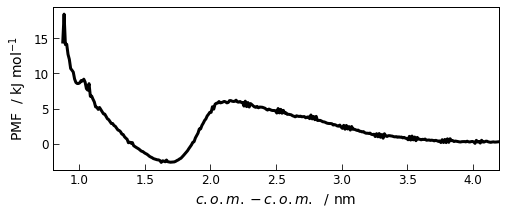

('R10, AMBER ff99SB-ILDN, Kd = 42', '+/- 2', ' mM')


In [37]:
path = workdir+'/distances/60mM/r10_108_a99/dist/'
Kd_plot(path,l='R10, AMBER ff99SB-ILDN',rc=2.2)

## Calculate PMF using WHAM

The following is an implementation of the WHAM algorithm [1,2].

In [31]:
def wham(sims,path,ab_name,timestart=-90000, temperature=293):
    RT = 8.3145*temperature/1000      # energy unit, (kJ/mol)
    ks = 500.              # bias spring constant, (kJ/mol/nm^2)
    numsims = sims.size
        
    xmax = np.loadtxt(path+str(sims.max())+ab_name+'.dat',comments={'#','@'})[:,1].max()

    xedges = np.arange(0,xmax,0.01)
    xvalues = xedges[:-1]+(xedges[1]-xedges[0])*0.5
    xnumbins = xedges.size-1
    Ubiases = np.zeros((numsims,xnumbins))
    Hx = np.zeros((numsims,xnumbins))
    
    for n,sim in enumerate(sims): 
        x = np.loadtxt(path+str(sim)+ab_name+'.dat',comments={'#','@'},usecols=(0,1))
        bx = find_nearest(x[:,0],timestart)
        if (x[0,0] != 0):
            print('ERROR: Window'+str(sim)+'- First Time not Zero:')
            print(x[0,0])
        center = x[0,1]
        x = x[bx:,1]
        hx,xedges = np.histogram(x,bins=xedges,normed=True)
        Hx[n] = hx
        Ubiases[n] = 0.5*ks*np.power(center-xvalues,2)
        plt.plot(xvalues,hx)
    plt.ylabel('$P(r)$')
    plt.xlabel('$r$  / nm')
    plt.show()

    #### WHAM variables
    Fx = np.zeros((numsims,))   # Free energy constants 
    Px = np.zeros((xnumbins,))    

    #### Variables tracking the progress of change
    Fprog = np.empty(0)
    niter = 0
    change = 0.05

    while change > 1e-6:
        numPx = np.zeros((xnumbins,))      # Numerator for equation (8)
        denPx = np.zeros((xnumbins,))      # Denominator for equation (8)
        Px = np.zeros((xnumbins,))           # Probabilities from equation (8)

        #### Calculate probabilities from free energies
        for n,sim in enumerate(sims):
            numPx = numPx + Hx[n]
            denPx = denPx + Hx.sum()*np.exp((Fx[n]-Ubiases[n])/RT)
        Px = np.divide(numPx,denPx)
        for n,sim in enumerate(sims):
            Fx[n] = np.multiply(Px,np.exp(-Ubiases[n]/RT)).sum()
        Fx = -RT*np.log(Fx)
        Fx = Fx - Fx.min() 

        #### Measure change in free energy constants
        Fprog = np.append(Fprog, Fx)
        Fprog = Fprog.reshape(int(Fprog.size/Fx.size),Fx.size)
        if niter > 2:
            change = np.abs(Fprog[-2,:]-Fprog[-1,:]).sum()
        niter = niter + 1

    plt.show()

    rUx = -np.log(Px/xvalues/xvalues) 
    idx = find_nearest(xvalues,3)
    plt.plot(xvalues,rUx-rUx[idx],'b-')
    plt.ylabel('PMF-PMF(3 nm) / $kT$')
    plt.xlabel('$r$  / nm')
    np.savetxt(path+'PMF'+ab_name+'.dat',np.column_stack((xvalues,rUx)))
    plt.show()

Here we plot histograms of the constrained distance in umbrella sampling windows and the corresponding PMFs.

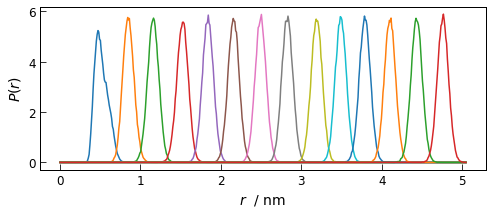

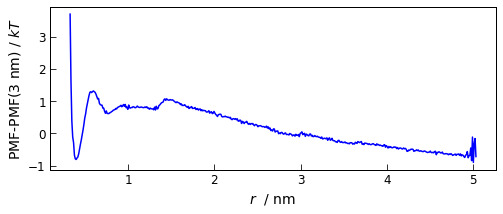

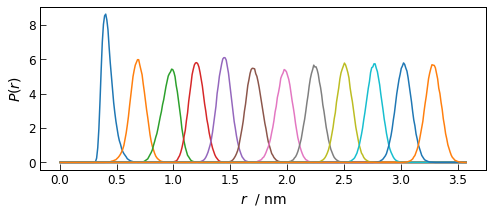

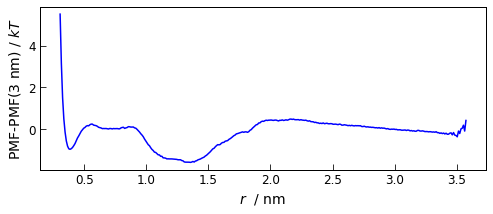

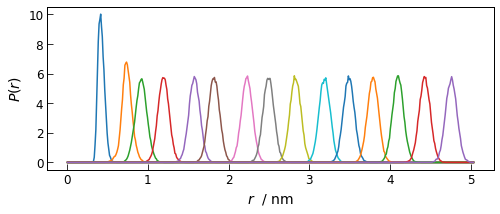

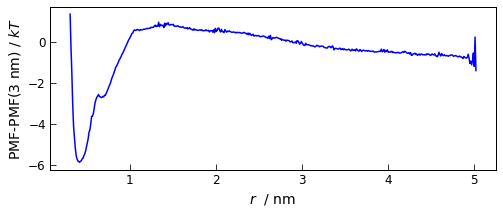

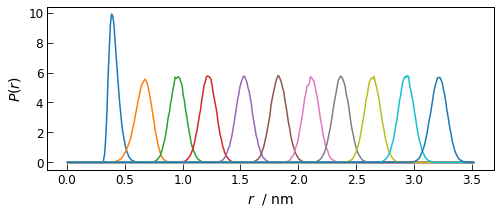

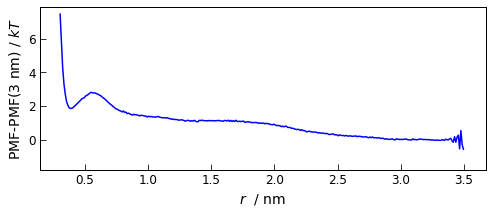

In [32]:
path = workdir+'/distances/60mM/r10_99_a03/rc/'
wham(windows_r10_60,path,'-99',timestart=1000, temperature=293)

path = workdir+'/distances/60mM/r10_108_a99/rc/'
wham(windows_r10_60_108, path,'-108',timestart=1000, temperature=293)

path = workdir+'/distances/60mM/r10_99_a99/rc/'
wham(windows_r10_60_99, path,'-99',timestart=1000, temperature=293)

path = workdir+'/distances/60mM/r8_108_a99/rc/'
wham(windows_r8_60_108,path,'-108',timestart=1000, temperature=293)

### Calculate PMF along a Second Coordinate

A two-dimensional implementation of the weighted histogram analysis (WHAM) method is used to obtain PMFs as a function of peptide-peptide center-of-mass ($c.o.m.$) separation from MD umbrella simulations where the constrained distance is either $CZ10-CZ8$ or $CZ9-CZ9$. For the derivation of the Jacobian correction, we consider the probability distributions of $c.o.m.$ separation for constant values of the constrained coordinate. In the case of umbrella sampling simulations along $CZ9-CZ9$, we calculate the average distances between $c.o.m.$ and $CZ9$ in each peptide. The Jacobian correction is obtained from the sum, over the explored $CZ9-CZ9$ values, of the distributions of distances between points on the surfaces of two spheres of radius equal to the $c.o.m.-CZ9$ and centers at $CZ9-CZ9$ separation.
The script is an adaptation of the Matlab code provided by D. Minh [2].

In [30]:
#### Distance x between a and b is constrained
#### y is the distance between c and d 
#### a and c are on molecule 1
#### b and d are on molecule 2
#### This function calculates PMFs vs. x and y

from scipy.spatial import distance

def sample_spherical(npoints=1000, ndim=3):
    vec = np.random.randn(ndim, npoints) 
    vec /= np.linalg.norm(vec, axis=0)
    return vec

def wham_2d(sims,path,ab_name,cd_name,ac_name,bd_name,timestart=[100,200],temperature=293):
    RT = 8.3145*temperature/1000      # energy unit, (kJ/mol)
    ks = 500.              # bias spring constant, (kJ/mol/nm^2)
    numsims = sims.size
    
    xmax = np.loadtxt(path+str(sims.max())+ab_name+'.xvg',comments={'#','@'})[:,1].max()
    ymax = np.loadtxt(path+str(sims.max())+cd_name+'.xvg',comments={'#','@'})[:,1].max()

    xedges = np.arange(0,xmax,0.01)
    yedges = np.arange(0,ymax,0.01)
    xvalues = xedges[:-1]+(xedges[1]-xedges[0])*0.5
    yvalues = yedges[:-1]+(yedges[1]-yedges[0])*0.5
    xnumbins = xedges.size-1
    ynumbins = yedges.size-1

    rUx = np.empty(0)
    rUy = np.empty(0)
    
    # loop over different starting time to estimate error of PMFs
    for ts in timestart:
        Ubiases = np.zeros((numsims,xnumbins))
        Hx = np.zeros((numsims,xnumbins))
        Hxy = np.zeros((numsims,xnumbins,ynumbins))
        # Histograms
        for n,sim in enumerate(sims): 
            x = np.loadtxt(path+str(sim)+ab_name+'.xvg',comments={'#','@'},usecols=(0,1))
            y = np.loadtxt(path+str(sim)+cd_name+'.xvg',comments={'#','@'},usecols=(0,1))
            bx = find_nearest(x[:,0],ts)
            by = find_nearest(y[:,0],ts)
            if (x[1,0]-x[0,0] != y[1,0]-y[0,0]):
                print('ERROR: Window'+str(sim)+'- Different Sampling Frequencies:')
                print(x[1,0]-x[0,0],y[1,0]-y[0,0])
            if (x[0,0] != 0 or y[0,0] != 0):
                print('ERROR: Window'+str(sim)+'- First Time not Zero:')
                print(x[0,0],y[0,0])
            center = x[0,1]
            #print('First Frame at Time:',x[bx,0],'and',y[by,0],x[:3,0],y[:3,0])
            x = x[bx:,1]
            y = y[by:,1]
            if (x.size > y.size):
                x = x[:y.size]
            elif (y.size > x.size):
                y = y[:x.size]
            if (x.size != y.size):
                print('ERROR: Window'+str(sim)+'- Still Different Number of Distances:')
                print(x.size, y.size)
            hx,xedges = np.histogram(x,bins=xedges,normed=True)
            hxy,xedges,yedges = np.histogram2d(x,y,bins=(xedges,yedges),normed=True)
            Hx[n] = hx
            Hxy[n] = hxy 
            Ubiases[n] = 0.5*ks*np.power(center-xvalues,2)
            plt.plot(xvalues,hx)

        # WHAM variables
        Fx = np.zeros((numsims,))   # Free energy constants Fx_i
        Px = np.zeros((xnumbins,))  

        # Variables tracking the progress of change
        Fprog = np.empty(0)
        niter = 0
        change = 0.05

        while change > 1e-6:
            numPx = np.zeros((xnumbins,))      
            denPx = np.zeros((xnumbins,))      
            numPxy = np.zeros((xnumbins,ynumbins))
            denPxy = np.zeros((xnumbins,ynumbins))
            Px = np.zeros((xnumbins,))           
            Pxy = np.zeros((xnumbins,ynumbins))

            # Calculate probabilities from free energies
            for n,sim in enumerate(sims):
                numPx = numPx + Hx[n]
                numPxy = numPxy + Hxy[n]
                denPx = denPx + Hx.sum()*np.exp((Fx[n]-Ubiases[n])/RT)
                denPxy = denPxy + np.ones((xnumbins,)).dot(Hxy.sum().sum()*np.exp((Fx[n]-Ubiases[n])/RT))
            Px = np.divide(numPx,denPx)
            Pxy = np.divide(numPxy,denPxy)
            for n,sim in enumerate(sims):
                Fx[n] = np.multiply(Px,np.exp(-Ubiases[n]/RT)).sum()
            Fx = -RT*np.log(Fx)
            Fx = Fx - Fx.min() 

            # Measure change in free energy constants
            Fprog = np.append(Fprog, Fx)
            Fprog = Fprog.reshape(int(Fprog.size/Fx.size),Fx.size)
            if niter > 2:
                change = np.abs(Fprog[-2,:]-Fprog[-1,:]).sum()
            niter = niter + 1

        # PMF along biased coordinate
        rUx = np.append(rUx, -np.log(Px/xvalues/xvalues))  
        np.savetxt(path+'Px'+ab_name+'.dat',np.column_stack((xvalues,Px)))

        # Jacobian correction for distance distribution along the 2nd coordinate
        ac = np.empty(0)
        bd = np.empty(0)
        for sim in sims: 
            arr_ac = np.loadtxt(path+str(sim)+ac_name+'.xvg',comments={'#','@'},usecols=(0,1))
            bac = find_nearest(arr_ac[:,0],ts)
            mean_ac = arr_ac[bac:,1].mean()
            ac = np.append(ac,mean_ac)
            arr_bd = np.loadtxt(path+str(sim)+bd_name+'.xvg',comments={'#','@'},usecols=(0,1))
            bbd = find_nearest(arr_bd[:,0],ts)
            mean_bd = arr_ac[bbd:,1].mean()
            bd = np.append(bd,mean_bd)
            #print(mean_ac,mean_bd)

        Nxy = np.zeros((xnumbins,ynumbins))
        xs, ys, zs = sample_spherical()
        for row,xdist in enumerate(xvalues):
            xs1 = xs*ac.mean()
            ys1 = ys*ac.mean()
            zs1 = zs*ac.mean()
            xs2 = xs*bd.mean() + xdist
            ys2 = ys*bd.mean()
            zs2 = zs*bd.mean()
            sphere1 = np.stack((xs1,ys1,zs1)).T
            sphere2 = np.stack((xs2,ys2,zs2)).T
            distances = distance.cdist(sphere1,sphere2)
            tri_upper_diag = np.tril(distances,k=1)
            nonzero = tri_upper_diag[np.nonzero(tri_upper_diag)]
            hist, yedges = np.histogram(nonzero,bins=yedges)
            Nxy[row,:] = Nxy[row,:] + hist

        np.savetxt(path+'Nxy'+cd_name+'.dat',Nxy)
        Py = Pxy.sum(axis=0)
        Ny = Nxy.sum(axis=0)
        np.savetxt(path+'Ny'+cd_name+'.dat',np.column_stack((yvalues,Ny)))
        np.savetxt(path+'Py'+cd_name+'.dat',np.column_stack((yvalues,Py)))
        rUy = np.append(rUy, -np.log(Py/Ny))
        
    plt.ylabel('$P(r)$')
    plt.xlabel('$r$  / nm')
    plt.show()
    
    rUx = rUx.reshape((len(timestart),xvalues.size)).T
    rUx_avg = np.average(rUx,axis=1)
    rUx_std = np.std(rUx,axis=1)
        
    rUy = rUy.reshape((len(timestart),yvalues.size)).T
    rUy_avg = np.average(rUy,axis=1)
    rUy_std = np.std(rUy,axis=1)
    
    idx = find_nearest(xvalues,3)
    plt.plot(xvalues,rUx_avg-rUx_avg[idx],'b-')
    plt.plot(xvalues,(rUx_avg-rUx_avg[idx])+rUx_std,'r-')
    plt.plot(xvalues,(rUx_avg-rUx_avg[idx])-rUx_std,'g-')
    
    np.savetxt(path+'pmfx'+ab_name+'.dat',np.column_stack((xvalues,rUx_avg,rUx_std*2)))
    np.savetxt(path+'pmfy'+cd_name+'.dat',np.column_stack((yvalues,rUy_avg,rUy_std*2)))
        
    plt.ylabel('PMF-PMF(3 nm)  / $kT$')
    plt.xlabel('$r$  / nm')
    plt.show()

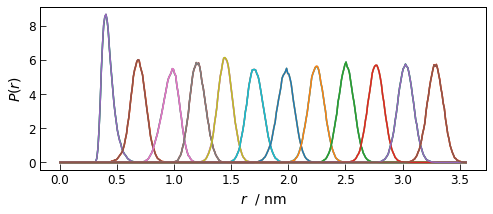

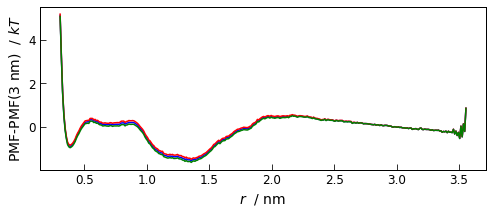

In [43]:
path = workdir+'/distances/60mM/r10_108_a99/dist/'
wham_2d(windows_r10_60_108, path,'-108','-99','-910_1','-98_2',timestart=[1000,2000,3000], temperature=293)

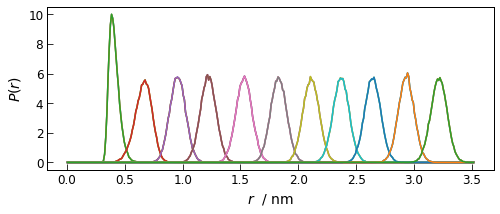

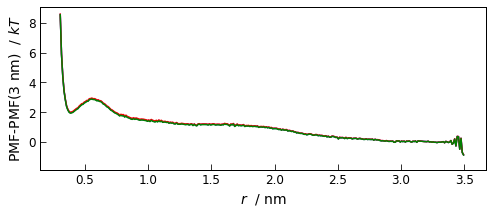

In [44]:
path = workdir+'/distances/60mM/r8_108_a99/dist/'
wham_2d(windows_r8_60_108, path,'-108','-99','-910_1','-98_2',timestart=[1000,2000,3000], temperature=293)

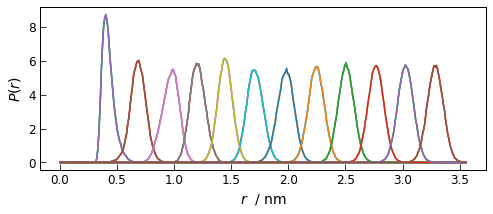

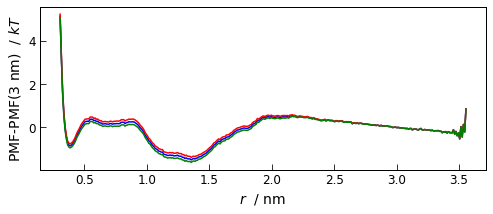

In [56]:
path = workdir+'/distances/60mM/r10_108_a99/dist/'
wham_2d(windows_r10_60_108, path,'-108','-com','-com10_1','-com8_2',timestart=[1000,2500,5000],temperature=293)

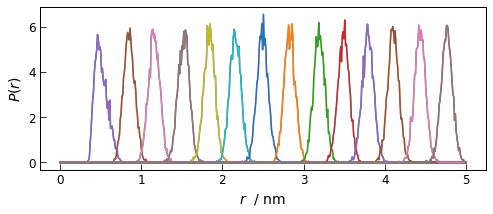

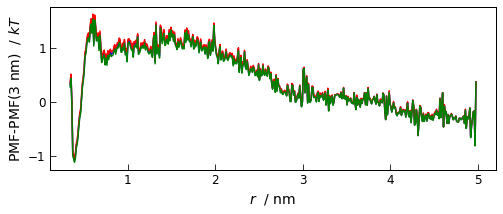

In [31]:
path = workdir+'/distances/60mM/r10_99_a03/dist/'
wham_2d(windows_r10_60, path,'-99','-com','-com9_1','-com9_2',timestart=[1000,2000,3000], temperature=293)

### References

[1] B. Roux. The calculation of the potential of mean force using computer simulations. Computer Physics Communications 91, 275 (1995). 

[2] D. Minh. Multidimensional Potentials of Mean Force from Biased Experiments Along a Single Coordinate. Journal of Physical Chemistry B 111(16), 4137-4140 (2007). 